# Model Fitting
---

In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


From toturial: https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/

Includes some functions I will reuse later on with our data


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/NMA/breast_cancer_data.csv')

In [ ]:
# Separate features and target variable
X = dataset.iloc[:, 2:-1].values
y = dataset. iloc [:, 1].values
print("Matrix of features", X, sep='\n') # so everything except for id, and diagnosis
print("--------------------------------------------------")
print("Target Variable", y, sep='\n') #label diagnosis

Matrix of features
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
--------------------------------------------------
Target Variable
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'

In [ ]:
# Label Encode the target variable
# Change target variable to numerical values
        # The number 0 represents benign, while 1 represents malignant.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{'B': 0, 'M': 1}
Label Encoded Target Variable
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# #define the model
# decision_tree_model = DecisionTreeClassifier(criterion="entropy",
#                                      random_state=0)

# #perform cross validation with model
# decision_tree_result = cross_validation(decision_tree_model, X, encoded_y, 10)
# print(decision_tree_result)


In [ ]:
# # Plot Accuracy Result
# model_name = "Decision Tree"
# plot_result(model_name,
#             "Accuracy",
#             "Accuracy scores in 10 Folds",
#             decision_tree_result["Training Accuracy scores"],
#             decision_tree_result["Validation Accuracy scores"])

## Model fMRI
---

In [ ]:
# load dataset
data_BOLD = pd.read_csv('/content/drive/MyDrive/NMA/BOLD_contrast_network_98.csv')
data_IES = pd.read_csv('/content/drive/MyDrive/NMA/ies_scores_98.csv')
data_personality = pd.read_csv('/content/drive/MyDrive/NMA/median_personality _98.csv')

In [ ]:
data_IES

,SUBJECTS,EMOTION T1 IES,EMOTION T2 IES,SOCIAL T1 IES,SOCIAL T2 IES,GAMBLING IES
0,100307,6.994464,6.238000,4.790000,5.750,3.609062
1,100408,7.119444,6.708667,10.593333,12.675,4.811875
2,101915,9.155087,8.345333,11.930000,13.990,5.093125
3,102816,7.111111,6.612000,11.890000,14.195,4.874375
4,103414,7.847222,8.561333,7.386667,7.955,4.704063
...,...,...,...,...,...,...
93,199655,7.082907,6.660000,6.656667,9.225,3.010625
94,200614,7.932778,8.359333,6.043333,8.830,4.212500
95,201111,11.040556,9.281333,10.126667,10.270,5.563750
96,201414,8.061667,8.048000,9.090000,11.725,3.100312


In [ ]:
data_BOLD

,subject_id,Emotion_Auditory_L,Emotion_Auditory_R,Emotion_Cingulo-Oper_L,Emotion_Cingulo-Oper_R,Emotion_Default_L,Emotion_Default_R,Emotion_Dorsal-atten_L,Emotion_Dorsal-atten_R,Emotion_Frontopariet_L,...,Gambling_Posterior-Mu_L,Gambling_Posterior-Mu_R,Gambling_Somatomotor_L,Gambling_Somatomotor_R,Gambling_Ventral-Mult_L,Gambling_Ventral-Mult_R,Gambling_Visual1_L,Gambling_Visual1_R,Gambling_Visual2_L,Gambling_Visual2_L.1
0,100307,-2.804921,-2.433804,-0.777985,-0.353353,10.053771,5.986613,11.420777,8.673832,4.628537,...,-7.973004,2.530932,-3.179724,-1.810594,-7.124124,1.524933,-3.339643,-3.025932,8.826484,7.199637
1,100408,3.516186,7.529671,-9.521039,-5.284645,-8.731886,7.884268,11.791724,1.867515,-8.937923,...,-24.315753,-18.506888,-6.057032,4.568156,-48.646206,-11.067792,-16.796800,-5.983401,-8.297101,6.657371
2,101915,9.980518,5.266869,9.546204,11.319655,8.908589,20.103598,0.907064,12.911264,2.576694,...,-1.944254,-0.950986,0.150241,3.160913,-8.325856,-9.110250,-7.625908,-1.689586,-1.384789,1.175621
3,102816,20.833271,-16.487274,1.886792,-0.946059,10.643481,3.247931,13.517639,13.682730,-7.682030,...,-3.673315,-2.800902,12.236763,6.242775,-9.369718,-12.720637,8.636415,20.621203,9.931208,8.350895
4,103414,9.885700,5.633930,9.734162,9.824339,13.819462,21.356125,21.945681,7.596248,13.637148,...,9.498112,7.589702,4.858379,14.831399,21.459354,-7.949689,18.820264,10.545901,12.616854,12.111169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,199655,-3.796242,-3.248363,-12.931731,-7.968932,-1.838899,-2.248285,-0.109514,1.404556,-8.534893,...,-4.010796,1.193511,0.801685,-0.544744,-0.791156,22.397713,-2.309791,9.854299,-1.874123,0.729667
94,200614,-2.340933,-0.460370,-6.904875,-13.213405,-0.929012,-7.979797,11.367749,18.012441,-1.613193,...,11.388163,11.611773,-12.670486,4.437090,1.793672,-0.470018,-8.310730,9.031029,-6.830466,-0.281131
95,201111,-0.313696,-3.006372,7.014663,-1.106524,7.094315,1.009450,9.850395,6.223135,2.587723,...,-1.079248,10.458447,-10.125810,-8.503565,6.909634,26.248419,15.927485,13.441762,6.393254,4.603233
96,201414,9.047621,3.032789,-4.672088,-2.014852,0.149621,22.042231,1.823159,22.238250,-1.161439,...,4.350870,2.288127,-0.454990,7.512785,10.580950,7.709618,0.995246,0.200687,3.556047,14.316392


In [ ]:
data_IES

,SUBJECTS,EMOTION T1 IES,EMOTION T2 IES,SOCIAL T1 IES,SOCIAL T2 IES,GAMBLING IES
0,100307,6.994464,6.238000,4.790000,5.750,3.609062
1,100408,7.119444,6.708667,10.593333,12.675,4.811875
2,101915,9.155087,8.345333,11.930000,13.990,5.093125
3,102816,7.111111,6.612000,11.890000,14.195,4.874375
4,103414,7.847222,8.561333,7.386667,7.955,4.704063
...,...,...,...,...,...,...
93,199655,7.082907,6.660000,6.656667,9.225,3.010625
94,200614,7.932778,8.359333,6.043333,8.830,4.212500
95,201111,11.040556,9.281333,10.126667,10.270,5.563750
96,201414,8.061667,8.048000,9.090000,11.725,3.100312


In [ ]:
data_personality

,Subject,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E
0,100307,1,0,1,0,1
1,100408,0,1,0,0,1
2,101915,1,1,1,0,1
3,102816,1,0,0,0,1
4,103414,0,1,0,1,1
...,...,...,...,...,...,...
93,199655,0,1,0,0,0
94,200614,1,0,1,0,1
95,201111,1,1,1,1,0
96,201414,1,1,1,0,1


In [ ]:
# Format features and target variable
X_IES = data_IES.iloc[:, 1:].values
X_BOLD = data_BOLD.iloc[:,1:].values
#personality
y_A = data_personality.iloc[:, 1].values
y_O = data_personality.iloc[:, 2].values
y_C = data_personality.iloc[:, 3].values
y_N = data_personality.iloc[:, 4].values
y_E = data_personality.iloc[:, 5].values
print("Matrix of features", X_IES, sep='\n') # so everything except for id, and diagnosis
print("--------------------------------------------------")
print("Matrix of features BOLD", X_BOLD, sep='\n') # so everything except for id, and diagnosis
print("--------------------------------------------------")
print("Target Variable", y_A, sep='\n') #label Agreeableness

Matrix of features
[[ 6.99446367  6.238       4.79        5.75        3.6090625 ]
 [ 7.11944444  6.70866667 10.59333333 12.675       4.811875  ]
 [ 9.1550865   8.34533333 11.93       13.99        5.093125  ]
 [ 7.11111111  6.612      11.89       14.195       4.874375  ]
 [ 7.84722222  8.56133333  7.38666667  7.955       4.7040625 ]
 [ 7.71722222  8.13520408 10.8075     21.38        3.329375  ]
 [ 9.17555556  7.97066667  9.14       19.8         3.678125  ]
 [ 7.55944444  7.17        9.14       15.1         3.555     ]
 [ 6.64945312  7.00533333  7.12666667  6.49        3.0796875 ]
 [ 7.855       7.23333333  6.80333333  7.095       3.3903125 ]
 [ 7.65404844  8.12933333 11.81666667 12.22        8.1771875 ]
 [ 8.25444444 10.50532544  8.62        7.605       3.0190625 ]
 [ 6.98777778  8.168      11.48666667 10.125       3.63625   ]
 [ 8.356609    6.99933333  5.24666667 33.92        3.7440625 ]
 [ 7.38222222  7.73133333  7.76666667  8.095       2.980625  ]
 [ 7.86833333  8.65866667  6.83     

Let's analyze the data first

In [ ]:
from collections import Counter

In [ ]:
print(dict(Counter(y_A))) #Agreeableness
print(dict(Counter(y_O))) #Openness
print(dict(Counter(y_C))) #Conscientiousness
print(dict(Counter(y_N))) #Neuroticism
print(dict(Counter(y_E))) #Extraversion

{1: 50, 0: 48}
{0: 48, 1: 50}
{1: 52, 0: 46}
{0: 46, 1: 52}
{1: 51, 0: 47}


In y_A, y_O,and y_C, there is only one element with label `0`. This makes it impossible to train a model using label `0` and also evaluate it on that label.

The data is now well distributed

## Functions to train the model
---

Training y_N (Please ignore)

In [ ]:
# make a copy to keep the original data without labels
data_BOLD_ye = data_BOLD.copy()
data_BOLD_ye['y_E'] = y_E
# data_BOLD_ye_clean = data_BOLD_ye[data_BOLD_ye['y_E'] != 0]
X_BOLD_ye = data_BOLD_ye.iloc[:,1:-1].values # does not include subject_id and y_E
bold_y_E = data_BOLD_ye['y_E'].values


In [ ]:
# make a copy to keep the original data without labels
data_IES_ye = data_IES.copy()
data_IES_ye['y_E'] = y_E
data_IES_ye_clean = data_IES_ye[data_IES_ye['y_E'] != 0]
X_IES_ye = data_IES_ye_clean.iloc[:,1:-1].values # does not include subject_id and y_E
ies_y_E = data_IES_ye_clean['y_E'].values
#since the values of y_E are '1' and '2'. I will do -1 to each element to get '0' and '1'
ies_y_E = ies_y_E-1

y_N

In [ ]:
# make a copy to keep the original data without labels
data_BOLD_yn = data_BOLD.copy()
data_BOLD_yn['y_N'] = y_N
data_BOLD_yn_clean = data_BOLD_yn[data_BOLD_yn['y_N'] != 2]
X_BOLD_yn = data_BOLD_yn_clean.iloc[:,1:-1].values # does not include subject_id and y_N
bold_y_N = data_BOLD_yn_clean['y_N'].values

In [ ]:
# make a copy to keep the original data without labels
data_IES_yn = data_IES.copy()
data_IES_yn['y_N'] = y_N
data_IES_yn_clean = data_IES_yn[data_IES_yn['y_N'] != 2] #outlier class is 2
X_IES_yn = data_IES_yn_clean.iloc[:,1:-1].values # does not include subject_id and y_N
ies_y_N = data_IES_yn_clean['y_N'].values

y_A

In [ ]:
dict(Counter(y_A))

{1: 50, 0: 48}

In [ ]:
# make a copy to keep the original data without labels
data_BOLD_ya = data_BOLD.copy()
data_BOLD_ya['y_A'] = y_A
data_BOLD_ya_clean = data_BOLD_ya[data_BOLD_ya['y_A'] != 0]
data_BOLD_ya1_clean = data_BOLD_ya_clean[data_BOLD_ya_clean['y_A'] == 1]
# add repeated data points with label 1 to oversample this class and make the dataset balanced
data_BOLD_ya_clean = pd.concat([data_BOLD_ya_clean, data_BOLD_ya1_clean])
data_BOLD_ya_clean = data_BOLD_ya_clean.sample(frac=1, random_state=42)
X_BOLD_ya = data_BOLD_ya_clean.iloc[:,1:-1].values # does not include subject_id and y_A
bold_y_A = data_BOLD_ya_clean['y_A'].values
#since the values of y_A are '1' and '2'. I will do -1 to each element to get '0' and '1'
bold_y_A = bold_y_A-1

In [ ]:
dict(Counter(bold_y_A))

{0: 100}

In [ ]:
# make a copy to keep the original data without labels
data_IES_ya = data_IES.copy()
data_IES_ya['y_A'] = y_A
data_IES_ya_clean = data_IES_ya[data_IES_ya['y_A'] != 0]
data_IES_ya1_clean = data_IES_ya[data_IES_ya['y_A'] == 1]
# add repeated data points with label 1 to oversample this class and make the dataset balanced
data_IES_ya_clean = pd.concat([data_IES_ya_clean, data_IES_ya1_clean])
X_IES_ya = data_IES_ya_clean.iloc[:,1:-1].values # does not include subject_id and y_A
ies_y_A = data_IES_ya_clean['y_A'].values
#since the values of y_A are '1' and '2'. I will do -1 to each element to get '0' and '1'
ies_y_A = ies_y_A-1

## Extract relevant network
---

In [ ]:
#Extract relevant network
# Social Cognition: dorso-atten, cingulo oper, default network
# Gambling: Cingulo-Oper, Somatomotor
# Emotion:  Posterior-Mu, Orbito-Affec
list_rel_networks = ["Emotion_Orbito-Affec_L" , "Emotion_Orbito-Affec_R" , "Emotion_Posterior-Mu_L" ,	"Emotion_Posterior-Mu_R",
"Social_Default_L" , "Social_Default_R" , "Social_Dorsal-atten_L" , "Social_Dorsal-atten_R" , "Social_Cingulo-Oper_L" , "Social_Cingulo-Oper_R",
"Gambling_Cingulo-Oper_L" , "Gambling_Cingulo-Oper_R","Gambling_Somatomotor_L","Gambling_Somatomotor_R"]

data_BOLD_rel_networks = data_BOLD.loc[:, list_rel_networks]
X_BOLD_rel_networks = data_BOLD.loc[:, list_rel_networks].values

print("X_BOLD_rel",X_BOLD_rel_networks)


data_BOLD_rel_networks

X_BOLD_rel [[ 28.43122907   0.45423503   5.57731995 ...  -2.72906399  -3.17972421
   -1.81059444]
 [ -2.28557407  10.50433129   3.48441709 ...   1.55804715  -6.05703247
    4.56815643]
 [  2.37558422  20.70941068  10.91275624 ...   7.90590405   0.1502409
    3.16091272]
 ...
 [  6.09024801   7.16814804   2.71281271 ... -16.94888299 -10.12580988
   -8.50356458]
 [ 20.06966877  -2.22965354   1.99569376 ...  11.16623543  -0.45498965
    7.51278519]
 [ 20.63729181  21.44628432  20.10109145 ... -13.64763183 -19.45860156
  -16.55439367]]


,Emotion_Orbito-Affec_L,Emotion_Orbito-Affec_R,Emotion_Posterior-Mu_L,Emotion_Posterior-Mu_R,Social_Default_L,Social_Default_R,Social_Dorsal-atten_L,Social_Dorsal-atten_R,Social_Cingulo-Oper_L,Social_Cingulo-Oper_R,Gambling_Cingulo-Oper_L,Gambling_Cingulo-Oper_R,Gambling_Somatomotor_L,Gambling_Somatomotor_R
0,28.431229,0.454235,5.577320,-2.292669,7.947511,9.692712,7.256165,7.648978,2.103778,-4.409611,0.201830,-2.729064,-3.179724,-1.810594
1,-2.285574,10.504331,3.484417,6.491784,1.251033,23.132281,17.014608,13.279836,3.523961,11.183352,-10.916530,1.558047,-6.057032,4.568156
2,2.375584,20.709411,10.912756,14.266931,3.360379,26.191055,11.821487,4.827629,-6.936404,2.386275,6.541618,7.905904,0.150241,3.160913
3,-6.299961,11.344551,-16.024109,-6.153889,31.087654,43.157114,33.487436,9.643869,39.793509,21.317714,15.593201,4.404389,12.236763,6.242775
4,21.917341,-9.262694,10.743872,6.427080,24.837916,16.653878,16.779754,0.681534,13.613428,0.102399,1.520076,8.167790,4.858379,14.831399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2.353674,-5.315302,-2.678669,-3.597959,6.386875,15.979174,9.778716,16.583812,1.405442,1.693786,3.011257,-0.583554,0.801685,-0.544744
94,13.488223,-2.153168,-0.915092,-11.025394,6.462592,20.029918,12.159982,28.898447,0.610042,2.912552,-3.312991,5.908460,-12.670486,4.437090
95,6.090248,7.168148,2.712813,1.874720,0.794011,13.211028,5.884091,9.997345,-16.163660,-13.464351,-15.076135,-16.948883,-10.125810,-8.503565
96,20.069669,-2.229654,1.995694,12.395959,-14.147689,21.109725,16.930378,0.463004,-4.729206,-11.472062,11.540953,11.166235,-0.454990,7.512785


### Merging data for model 1.2 and 2.2
---

In [ ]:
# wanna merge X_IES with X_BOLD_rel_network
# maybe row extend??

df_all = pd.concat([data_IES, data_BOLD_rel_networks.iloc[:, 1:]], axis=1)
X_combined = df_all.iloc[:, 1:].values

# print(df_all)
print(X_combined)

[[  6.99446367   6.238        4.79       ...  -2.72906399  -3.17972421
   -1.81059444]
 [  7.11944444   6.70866667  10.59333333 ...   1.55804715  -6.05703247
    4.56815643]
 [  9.1550865    8.34533333  11.93       ...   7.90590405   0.1502409
    3.16091272]
 ...
 [ 11.04055556   9.28133333  10.12666667 ... -16.94888299 -10.12580988
   -8.50356458]
 [  8.06166667   8.048        9.09       ...  11.16623543  -0.45498965
    7.51278519]
 [  8.51605536   7.414        7.97       ... -13.64763183 -19.45860156
  -16.55439367]]


In [ ]:

df_allnets = pd.concat([data_IES, data_BOLD.iloc[:, 1:]], axis=1)
X_combined_all = df_allnets.iloc[:, 1:].values

print(df_allnets)
print(X_combined_all)

    SUBJECTS  EMOTION T1 IES  EMOTION T2 IES  SOCIAL T1 IES  SOCIAL T2 IES  \
0     100307        6.994464        6.238000       4.790000          5.750   
1     100408        7.119444        6.708667      10.593333         12.675   
2     101915        9.155087        8.345333      11.930000         13.990   
3     102816        7.111111        6.612000      11.890000         14.195   
4     103414        7.847222        8.561333       7.386667          7.955   
..       ...             ...             ...            ...            ...   
93    199655        7.082907        6.660000       6.656667          9.225   
94    200614        7.932778        8.359333       6.043333          8.830   
95    201111       11.040556        9.281333      10.126667         10.270   
96    201414        8.061667        8.048000       9.090000         11.725   
97    205119        8.516055        7.414000       7.970000         21.400   

    GAMBLING IES  Emotion_Auditory_L  Emotion_Auditory_R  \
0  

##Shuffle the data

In [ ]:
import random

X_BOLD_rel_net_random = X_BOLD_rel_networks.copy()
# print(X_BOLD_random)
np.random.shuffle(X_BOLD_rel_net_random)
# print("\n after shuffling: ",X_BOLD_random)

#check shuffle row properly?
for i, elem in enumerate(X_BOLD_rel_net_random):
  if (elem == X_BOLD_rel_networks[0]).all():
    print(elem,"index: ",i)

X_IES_random = X_IES.copy()
# print("\n",X_IES_random)
np.random.shuffle(X_IES_random)
# print("\n after shuffling: ",X_IES_random)

#check shuffle row properly?
for i, elem in enumerate(X_IES_random):
  if (elem == X_IES[0]).all():
    print(elem,"index: ",i)


 after shuffling:  [[ 16.45218713  11.38416407  -3.60465966 ...  15.48796208   7.96992576
   -2.74994526]
 [ -0.34926509  -6.22595071 -11.57751518 ...   7.69581071  -8.43524908
    7.1706866 ]
 [ 14.92651966  -3.73512732   7.23280184 ...  -9.79579736   7.20520023
    4.20299898]
 ...
 [ 14.4729777   -0.07256222  10.83421641 ...  -2.13700959   2.33014651
    9.49200178]
 [-14.01305881 -11.66171774 -14.09056564 ...  -0.79217031  15.67001269
   14.88915906]
 [ -9.10286363   3.51498535 -16.55086295 ... -11.4951203  -13.24858253
    2.69033476]]
[28.43122907  0.45423503  5.57731995 -2.29266949  7.9475113   9.69271182
  7.25616452  7.64897799  2.10377849 -4.40961087  0.20183027 -2.72906399
 -3.17972421 -1.81059444] index:  94
[6.99446367 6.238      4.79       5.75       3.6090625 ] index:  63


In [ ]:
# IES + shuffled bold
# merge these together
df_X_BOLD_rel_networks = data_BOLD.loc[:, list_rel_networks]
df_X_BOLD_rel_networks_shuffled = df_X_BOLD_rel_networks.sample(frac=1, random_state=42)
# NOTE we are mixing the columns of different subjects!! so one subject has features from other subjects
df_all_shuf = pd.concat([data_IES, df_X_BOLD_rel_networks_shuffled.iloc[:, 1:]], axis=1)
X_IES_BOLD_shuf = df_all_shuf.iloc[:, 1:].values

X_IES_BOLD_shuf

array([[  6.99446367,   6.238     ,   4.79      , ...,  -2.72906399,
         -3.17972421,  -1.81059444],
       [  7.11944444,   6.70866667,  10.59333333, ...,   1.55804715,
         -6.05703247,   4.56815643],
       [  9.1550865 ,   8.34533333,  11.93      , ...,   7.90590405,
          0.1502409 ,   3.16091272],
       ...,
       [ 11.04055556,   9.28133333,  10.12666667, ..., -16.94888299,
        -10.12580988,  -8.50356458],
       [  8.06166667,   8.048     ,   9.09      , ...,  11.16623543,
         -0.45498965,   7.51278519],
       [  8.51605536,   7.414     ,   7.97      , ..., -13.64763183,
        -19.45860156, -16.55439367]])

In [ ]:
df_all = pd.concat([data_IES, data_BOLD_rel_networks.iloc[:, 1:]], axis=1)
df_all = df_all.sample(frac=1, random_state=42)

In [ ]:
df_all

,SUBJECTS,EMOTION T1 IES,EMOTION T2 IES,SOCIAL T1 IES,SOCIAL T2 IES,GAMBLING IES,Emotion_Orbito-Affec_R,Emotion_Posterior-Mu_L,Emotion_Posterior-Mu_R,Social_Default_L,Social_Default_R,Social_Dorsal-atten_L,Social_Dorsal-atten_R,Social_Cingulo-Oper_L,Social_Cingulo-Oper_R,Gambling_Cingulo-Oper_L,Gambling_Cingulo-Oper_R,Gambling_Somatomotor_L,Gambling_Somatomotor_R
62,156233,9.175556,8.728000,11.347500,8.370,4.710312,47.444448,-10.106824,16.675076,56.434866,28.182136,31.546946,42.600209,55.595711,25.529516,-11.152869,2.489001,-40.084649,45.352231
40,133928,8.386111,8.172667,9.883333,4.585,6.611250,-2.774743,-4.332258,-4.875565,6.707974,21.594923,4.315081,5.944338,2.674365,-0.610924,11.541634,-8.039645,2.023116,-7.822105
94,200614,7.932778,8.359333,6.043333,8.830,4.212500,-2.153168,-0.915092,-11.025394,6.462592,20.029918,12.159982,28.898447,0.610042,2.912552,-3.312991,5.908460,-12.670486,4.437090
18,114924,7.387222,7.872000,10.575000,6.955,3.945312,1.288621,18.902996,19.232304,9.561598,22.492452,-17.725834,9.353869,36.199382,22.825000,-1.481654,11.656833,-7.408190,1.623945
81,185139,7.582422,7.282000,8.196667,9.025,4.887187,-2.815439,17.874201,5.387013,44.268219,46.451894,27.331754,29.353116,25.461625,17.506039,20.236217,12.966751,7.593207,6.259435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,153429,6.306111,6.891333,9.263333,6.960,4.628438,-9.412777,-16.422605,-11.352146,33.459260,34.156747,22.302166,6.948978,19.700245,20.156487,-2.216582,3.437919,-1.432907,1.421361
71,162329,9.322222,9.086667,7.596667,5.810,4.412500,-10.584116,1.107784,0.419456,16.108770,12.717068,0.852195,3.726035,3.553585,-8.032073,-11.537315,-9.315438,-2.816885,-2.717131
14,111514,7.382222,7.731333,7.766667,8.095,2.980625,-8.531749,13.911354,8.411415,13.149241,16.950228,12.188672,12.345472,3.525659,7.314959,-1.239870,-1.260985,-5.801990,-1.970751
92,199150,8.061667,7.386000,5.053333,5.330,3.450625,-4.016565,5.786369,12.045751,57.057203,81.129574,49.524420,61.291128,54.722875,69.305258,3.976578,-0.860398,0.308576,4.036385


## Cross Validation
---

In [ ]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
      '''Function to perform 10 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=10
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      # print(len(results))
      # print(results)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data, num_folds=10):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str,
            Name of the algorithm used for training e.g 'Decision Tree'

         y_label: str,
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str,
            This is the title of the plot e.g 'Accuracy Plot'

         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.

         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''

        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold", "7th Fold","8th Fold", "9th Fold","10th Fold"][:num_folds]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
num_folds = 10

## SVM
---

### 1.1 IES -> personality


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#define the model
svm = LinearSVC(max_iter=100000)
#perform cross validation with model


#y_A
svm_result = cross_validation(svm, X_IES, y_A, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

The main results are 
 Mean Validation F1: 0.6056099456099455 
 Mean Validation Accuracy 57.333333333333336


{'Training Accuracy scores': array([0.63636364, 0.67045455, 0.70454545, 0.64772727, 0.65909091,
        0.69318182, 0.67045455, 0.67045455, 0.59550562, 0.65168539]),
 'Mean Training Accuracy': 65.99463738508683,
 'Training Precision scores': array([0.63265306, 0.66      , 0.70212766, 0.65217391, 0.66666667,
        0.6875    , 0.66666667, 0.68181818, 0.59574468, 0.64583333]),
 'Mean Training Precision': 0.6591184163178349,
 'Training Recall scores': array([0.68888889, 0.73333333, 0.73333333, 0.66666667, 0.66666667,
        0.73333333, 0.71111111, 0.66666667, 0.62222222, 0.68888889]),
 'Mean Training Recall': 0.691111111111111,
 'Training F1 scores': array([0.65957447, 0.69473684, 0.7173913 , 0.65934066, 0.66666667,
        0.70967742, 0.68817204, 0.6741573 , 0.60869565, 0.66666667]),
 'Mean Training F1 Score': 0.6745079025122479,
 'Validation Accuracy scores': array([0.6       , 0.5       , 0.3       , 0.5       , 0.7       ,
        0.6       , 0.6       , 0.6       , 0.77777778, 0.55

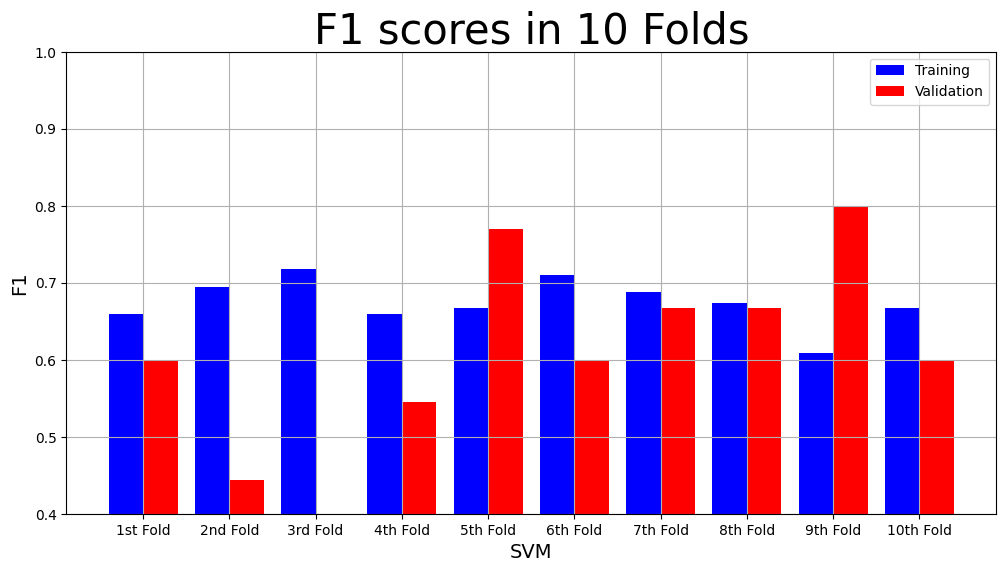

In [ ]:
model_name = "SVM"
plot_result(model_name,
            "F1",
            "F1 scores in 10 Folds",
            svm_result["Training F1 scores"],
            svm_result["Validation F1 scores"])

In [ ]:
#y_O

#define the model
svm = LinearSVC(max_iter=100000)

svm_result = cross_validation(svm, X_IES, y_O, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result



The main results are 
 Mean Validation F1: 0.5646176046176047 
 Mean Validation Accuracy 53.333333333333336


{'Training Accuracy scores': array([0.57954545, 0.61363636, 0.54545455, 0.63636364, 0.60227273,
        0.57954545, 0.59090909, 0.51136364, 0.5505618 , 0.53932584]),
 'Mean Training Accuracy': 57.48978549540347,
 'Training Precision scores': array([0.58333333, 0.60377358, 0.54901961, 0.62264151, 0.61904762,
        0.58695652, 0.60465116, 0.52      , 0.55319149, 0.54      ]),
 'Mean Training Precision': 0.5782614828455243,
 'Training Recall scores': array([0.62222222, 0.71111111, 0.62222222, 0.73333333, 0.57777778,
        0.6       , 0.57777778, 0.57777778, 0.57777778, 0.6       ]),
 'Mean Training Recall': 0.6199999999999999,
 'Training F1 scores': array([0.60215054, 0.65306122, 0.58333333, 0.67346939, 0.59770115,
        0.59340659, 0.59090909, 0.54736842, 0.56521739, 0.56842105]),
 'Mean Training F1 Score': 0.5975038181942168,
 'Validation Accuracy scores': array([0.4       , 0.6       , 0.8       , 0.5       , 0.3       ,
        0.4       , 0.4       , 0.6       , 0.77777778, 0.5

In [ ]:
#y_C
#define the model
svm = LinearSVC(max_iter=100000)

svm_result = cross_validation(svm, X_IES, y_C, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result



The main results are 
 Mean Validation F1: 0.5350305250305251 
 Mean Validation Accuracy 42.77777777777778


{'Training Accuracy scores': array([0.56818182, 0.55681818, 0.60227273, 0.52272727, 0.55681818,
        0.52272727, 0.57954545, 0.59090909, 0.57303371, 0.61797753]),
 'Mean Training Accuracy': 56.91011235955056,
 'Training Precision scores': array([0.56666667, 0.56603774, 0.59677419, 0.53731343, 0.56451613,
        0.54385965, 0.59615385, 0.59322034, 0.57377049, 0.61403509]),
 'Mean Training Precision': 0.575234757171447,
 'Training Recall scores': array([0.73913043, 0.65217391, 0.78723404, 0.76595745, 0.74468085,
        0.65957447, 0.65957447, 0.74468085, 0.74468085, 0.74468085]),
 'Mean Training Recall': 0.7242368177613321,
 'Training F1 scores': array([0.64150943, 0.60606061, 0.67889908, 0.63157895, 0.64220183,
        0.59615385, 0.62626263, 0.66037736, 0.64814815, 0.67307692]),
 'Mean Training F1 Score': 0.6404268806954594,
 'Validation Accuracy scores': array([0.6       , 0.2       , 0.4       , 0.6       , 0.4       ,
        0.5       , 0.4       , 0.4       , 0.44444444, 0.33

In [ ]:
y_N
#define the model
svm = LinearSVC(max_iter=100000)

svm_result = cross_validation(svm, X_IES, y_N, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

The main results are 
 Mean Validation F1: 0.514032634032634 
 Mean Validation Accuracy 49.222222222222214


{'Training Accuracy scores': array([0.61363636, 0.61363636, 0.60227273, 0.61363636, 0.56818182,
        0.61363636, 0.625     , 0.61363636, 0.62921348, 0.57303371]),
 'Mean Training Accuracy': 60.658835546476,
 'Training Precision scores': array([0.63265306, 0.62745098, 0.62      , 0.63265306, 0.59574468,
        0.63829787, 0.63829787, 0.63043478, 0.64583333, 0.58823529]),
 'Mean Training Precision': 0.6249600938432727,
 'Training Recall scores': array([0.65957447, 0.68085106, 0.65957447, 0.65957447, 0.59574468,
        0.63829787, 0.65217391, 0.63043478, 0.65957447, 0.63829787]),
 'Mean Training Recall': 0.64740980573543,
 'Training F1 scores': array([0.64583333, 0.65306122, 0.63917526, 0.64583333, 0.59574468,
        0.63829787, 0.64516129, 0.63043478, 0.65263158, 0.6122449 ]),
 'Mean Training F1 Score': 0.6358418251917739,
 'Validation Accuracy scores': array([0.5       , 0.4       , 0.3       , 0.6       , 0.6       ,
        0.3       , 0.6       , 0.4       , 0.44444444, 0.77777

In [ ]:
#y_E

#define the model
svm = LinearSVC(max_iter=100000)

svm_result = cross_validation(svm, X_IES, y_E, num_folds)
print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.631042291042291 
 Mean Validation Accuracy 58.33333333333333


{'Training Accuracy scores': array([0.61363636, 0.60227273, 0.625     , 0.63636364, 0.64772727,
        0.59090909, 0.56818182, 0.61363636, 0.60674157, 0.61797753]),
 'Mean Training Accuracy': 61.22446373850868,
 'Training Precision scores': array([0.6       , 0.59016393, 0.61016949, 0.61290323, 0.63157895,
        0.58928571, 0.5625    , 0.60714286, 0.59649123, 0.60714286]),
 'Mean Training Precision': 0.600737825576813,
 'Training Recall scores': array([0.73333333, 0.7826087 , 0.7826087 , 0.82608696, 0.7826087 ,
        0.7173913 , 0.7826087 , 0.73913043, 0.73913043, 0.73913043]),
 'Mean Training Recall': 0.7624637681159421,
 'Training F1 scores': array([0.66      , 0.6728972 , 0.68571429, 0.7037037 , 0.69902913,
        0.64705882, 0.65454545, 0.66666667, 0.66019417, 0.66666667]),
 'Mean Training F1 Score': 0.6716476098058746,
 'Validation Accuracy scores': array([0.6       , 0.7       , 0.3       , 0.4       , 0.5       ,
        0.7       , 0.7       , 0.6       , 0.77777778, 0.55

### 1.2 IES + relevant BOLD -> personality

In [ ]:
#y_A Try bold only
#define the model
svm = LinearSVC(max_iter=10000)
#perform cross validation with model

svm_result = cross_validation(svm, X_BOLD_rel_networks, y_A, num_folds)



print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

The main results are 
 Mean Validation F1: 0.538811188811189 
 Mean Validation Accuracy 54.22222222222223


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Training Accuracy scores': array([0.61363636, 0.72727273, 0.63636364, 0.65909091, 0.70454545,
        0.64772727, 0.67045455, 0.69318182, 0.62921348, 0.59550562]),
 'Mean Training Accuracy': 65.76991828396321,
 'Training Precision scores': array([0.63414634, 0.68421053, 0.76      , 0.68292683, 0.69387755,
        0.625     , 0.68181818, 0.66666667, 0.61538462, 0.59183673]),
 'Mean Training Precision': 0.6635867446631247,
 'Training Recall scores': array([0.57777778, 0.86666667, 0.42222222, 0.62222222, 0.75555556,
        0.77777778, 0.66666667, 0.8       , 0.71111111, 0.64444444]),
 'Mean Training Recall': 0.6844444444444445,
 'Training F1 scores': array([0.60465116, 0.76470588, 0.54285714, 0.65116279, 0.72340426,
        0.69306931, 0.6741573 , 0.72727273, 0.65979381, 0.61702128]),
 'Mean Training F1 Score': 0.6658095662620547,
 'Validation Accuracy scores': array([0.8       , 0.4       , 0.6       , 0.5       , 0.6       ,
        0.4       , 0.4       , 0.5       , 0.66666667, 0.5

In [ ]:
#y_A combined
#define the model
svm = LinearSVC(max_iter=1000000)
#perform cross validation with model

svm_result = cross_validation(svm, X_combined, y_A, num_folds)



print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.566868686868687 
 Mean Validation Accuracy 55.33333333333334


{'Training Accuracy scores': array([0.75      , 0.77272727, 0.75      , 0.84090909, 0.72727273,
        0.69318182, 0.73863636, 0.76136364, 0.73033708, 0.7752809 ]),
 'Mean Training Accuracy': 75.39708886618999,
 'Training Precision scores': array([0.74468085, 0.77777778, 0.75555556, 0.87804878, 0.75609756,
        0.71428571, 0.775     , 0.77272727, 0.73333333, 0.79069767]),
 'Mean Training Precision': 0.7698204520625502,
 'Training Recall scores': array([0.77777778, 0.77777778, 0.75555556, 0.8       , 0.68888889,
        0.66666667, 0.68888889, 0.75555556, 0.73333333, 0.75555556]),
 'Mean Training Recall': 0.74,
 'Training F1 scores': array([0.76086957, 0.77777778, 0.75555556, 0.8372093 , 0.72093023,
        0.68965517, 0.72941176, 0.76404494, 0.73333333, 0.77272727]),
 'Mean Training F1 Score': 0.7541514920434951,
 'Validation Accuracy scores': array([0.9       , 0.3       , 0.5       , 0.5       , 0.7       ,
        0.4       , 0.4       , 0.5       , 0.66666667, 0.66666667]),
 'M

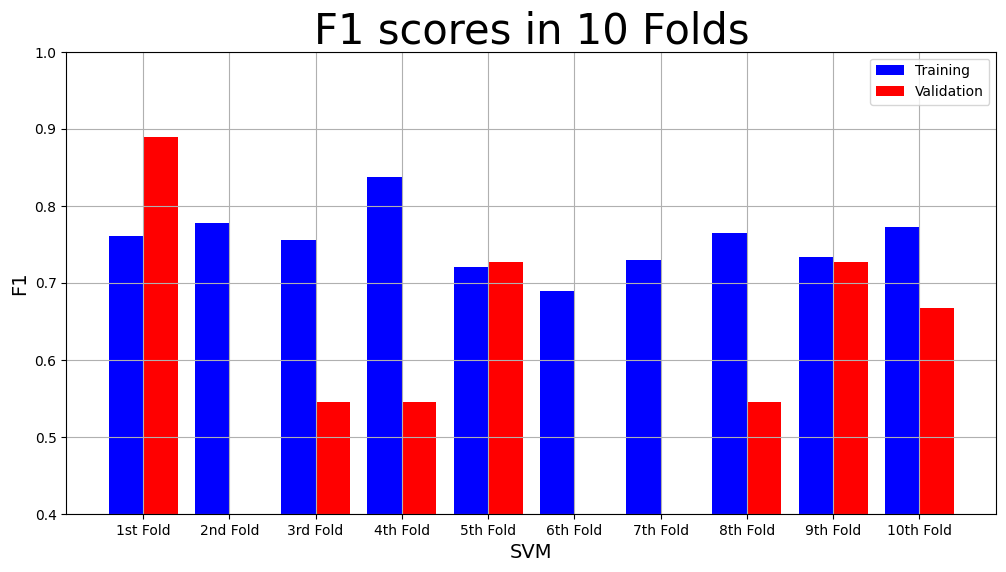

In [ ]:
model_name = "SVM"
plot_result(model_name,
            "F1",
            "F1 scores in 10 Folds",
            svm_result["Training F1 scores"],
            svm_result["Validation F1 scores"])

In [ ]:
#y_O combined
#define the model
svm = LinearSVC(max_iter=1000000)
#perform cross validation with model

svm_result = cross_validation(svm, X_combined, y_O, num_folds)



print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.45732323232323235 
 Mean Validation Accuracy 49.11111111111111


{'Training Accuracy scores': array([0.67045455, 0.70454545, 0.68181818, 0.67045455, 0.69318182,
        0.72727273, 0.70454545, 0.63636364, 0.68539326, 0.66292135]),
 'Mean Training Accuracy': 68.36950970377936,
 'Training Precision scores': array([0.66      , 0.73170732, 0.68888889, 0.68181818, 0.71428571,
        0.73333333, 0.74358974, 0.63265306, 0.72972973, 0.6744186 ]),
 'Mean Training Precision': 0.6990424574594416,
 'Training Recall scores': array([0.73333333, 0.66666667, 0.68888889, 0.66666667, 0.66666667,
        0.73333333, 0.64444444, 0.68888889, 0.6       , 0.64444444]),
 'Mean Training Recall': 0.6733333333333333,
 'Training F1 scores': array([0.69473684, 0.69767442, 0.68888889, 0.6741573 , 0.68965517,
        0.73333333, 0.69047619, 0.65957447, 0.65853659, 0.65909091]),
 'Mean Training F1 Score': 0.6846124111734776,
 'Validation Accuracy scores': array([0.6       , 0.6       , 0.2       , 0.5       , 0.2       ,
        0.5       , 0.4       , 0.8       , 0.55555556, 0.5

In [ ]:
#y_C combined
#define the model
svm = LinearSVC(max_iter=1000000)
#perform cross validation with model

svm_result = cross_validation(svm, X_combined, y_C, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.5745687645687647 
 Mean Validation Accuracy 51.888888888888886


{'Training Accuracy scores': array([0.68181818, 0.69318182, 0.70454545, 0.70454545, 0.68181818,
        0.65909091, 0.63636364, 0.71590909, 0.71910112, 0.74157303]),
 'Mean Training Accuracy': 69.37946884576098,
 'Training Precision scores': array([0.6875    , 0.71111111, 0.71428571, 0.71428571, 0.69387755,
        0.68085106, 0.64705882, 0.69642857, 0.72916667, 0.75      ]),
 'Mean Training Precision': 0.7024565216157386,
 'Training Recall scores': array([0.7173913 , 0.69565217, 0.74468085, 0.74468085, 0.72340426,
        0.68085106, 0.70212766, 0.82978723, 0.74468085, 0.76595745]),
 'Mean Training Recall': 0.7349213691026827,
 'Training F1 scores': array([0.70212766, 0.7032967 , 0.72916667, 0.72916667, 0.70833333,
        0.68085106, 0.67346939, 0.75728155, 0.73684211, 0.75789474]),
 'Mean Training F1 Score': 0.7178429876626047,
 'Validation Accuracy scores': array([0.9       , 0.3       , 0.5       , 0.8       , 0.4       ,
        0.5       , 0.4       , 0.5       , 0.55555556, 0.3

In [ ]:
#y_N combined
#define the model
svm = LinearSVC(max_iter=1000000)
#perform cross validation with model

svm_result = cross_validation(svm, X_combined, y_N, num_folds)



print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.5548701298701297 
 Mean Validation Accuracy 54.0


{'Training Accuracy scores': array([0.69318182, 0.67045455, 0.70454545, 0.76136364, 0.75      ,
        0.70454545, 0.67045455, 0.73863636, 0.71910112, 0.73033708]),
 'Mean Training Accuracy': 71.4262002042901,
 'Training Precision scores': array([0.70833333, 0.6875    , 0.71428571, 0.76      , 0.75510204,
        0.71428571, 0.68085106, 0.74468085, 0.73913043, 0.75555556]),
 'Mean Training Precision': 0.725972470795287,
 'Training Recall scores': array([0.72340426, 0.70212766, 0.74468085, 0.80851064, 0.78723404,
        0.74468085, 0.69565217, 0.76086957, 0.72340426, 0.72340426]),
 'Mean Training Recall': 0.7413968547641074,
 'Training F1 scores': array([0.71578947, 0.69473684, 0.72916667, 0.78350515, 0.77083333,
        0.72916667, 0.68817204, 0.75268817, 0.7311828 , 0.73913043]),
 'Mean Training F1 Score': 0.7334371582630613,
 'Validation Accuracy scores': array([0.4       , 0.7       , 0.5       , 0.5       , 0.5       ,
        0.6       , 0.8       , 0.4       , 0.66666667, 0.333

In [ ]:
#y_E combined
#define the model
svm = LinearSVC(max_iter=1000000)
#perform cross validation with model

svm_result = cross_validation(svm, X_combined, y_E, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.5316300366300366 
 Mean Validation Accuracy 51.22222222222222


{'Training Accuracy scores': array([0.68181818, 0.68181818, 0.68181818, 0.69318182, 0.69318182,
        0.69318182, 0.67045455, 0.75      , 0.68539326, 0.65168539]),
 'Mean Training Accuracy': 68.82533197139938,
 'Training Precision scores': array([0.68888889, 0.69565217, 0.67307692, 0.67924528, 0.69387755,
        0.68627451, 0.66666667, 0.75      , 0.68      , 0.65306122]),
 'Mean Training Precision': 0.6866743220878515,
 'Training Recall scores': array([0.68888889, 0.69565217, 0.76086957, 0.7826087 , 0.73913043,
        0.76086957, 0.73913043, 0.7826087 , 0.73913043, 0.69565217]),
 'Mean Training Recall': 0.7384541062801933,
 'Training F1 scores': array([0.68888889, 0.69565217, 0.71428571, 0.72727273, 0.71578947,
        0.72164948, 0.70103093, 0.76595745, 0.70833333, 0.67368421]),
 'Mean Training F1 Score': 0.7112544381083878,
 'Validation Accuracy scores': array([0.5       , 0.6       , 0.4       , 0.3       , 0.3       ,
        0.8       , 0.4       , 0.6       , 0.66666667, 0.5

### 1.3 IES + all networks -> personality


In [ ]:
# (X_combined_all)

#y_A combined
#define the model
svm = LinearSVC(max_iter=900000)
#perform cross validation with model

svm_result = cross_validation(svm, X_combined_all, y_A, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.4688888888888889 
 Mean Validation Accuracy 47.111111111111114


{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.4       , 0.5       , 0.6       , 0.4       , 0.5       ,
        0.4       , 0.4       , 0.4       , 0.55555556, 0.55555556]),
 'Mean Validation Accuracy': 47.111111111111114,
 'Validation Precision scores': array([0.4       , 0.5       , 0.6       , 0.42857143, 0.5       ,
        0.4       , 0.4       , 0.4       , 0.66666667, 0.6       ]),
 'Mean Validation Precision': 0.48952380952380947,
 'Validation Recall scores': array([0.4, 0.4, 0.6, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.6]),
 'Mean Validation Recall': 0.459999999999

In [ ]:
#y_O
svm = LinearSVC(max_iter=900000)
#perform cross validation with model

svm_result = cross_validation(svm, X_combined_all, y_O, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.5775757575757575 
 Mean Validation Accuracy 57.111111111111114


{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.7       , 0.5       , 0.6       , 0.6       , 0.3       ,
        0.3       , 0.8       , 0.8       , 0.44444444, 0.66666667]),
 'Mean Validation Accuracy': 57.111111111111114,
 'Validation Precision scores': array([0.75      , 0.5       , 0.57142857, 0.6       , 0.25      ,
        0.33333333, 0.8       , 0.8       , 0.5       , 0.75      ]),
 'Mean Validation Precision': 0.5854761904761905,
 'Validation Recall scores': array([0.6, 0.6, 0.8, 0.6, 0.2, 0.4, 0.8, 0.8, 0.4, 0.6]),
 'Mean Validation Recall': 0.58,
 'Validat

In [ ]:
#y_C
svm = LinearSVC(max_iter=900000)
#perform cross validation with model

svm_result = cross_validation(svm, X_combined_all, y_C, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.5012987012987014 
 Mean Validation Accuracy 52.666666666666664


{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.6       , 0.6       , 0.4       , 0.4       , 0.8       ,
        0.7       , 0.6       , 0.5       , 0.55555556, 0.11111111]),
 'Mean Validation Accuracy': 52.666666666666664,
 'Validation Precision scores': array([1.        , 0.75      , 0.4       , 0.42857143, 0.71428571,
        0.66666667, 0.57142857, 0.5       , 0.66666667, 0.        ]),
 'Mean Validation Precision': 0.5697619047619048,
 'Validation Recall scores': array([0.33333333, 0.5       , 0.4       , 0.6       , 1.        ,
        0.8       , 0.8       , 0.

In [ ]:
#y_N
svm = LinearSVC(max_iter=900000)
#perform cross validation with model

svm_result = cross_validation(svm, X_combined_all, y_N, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.5911111111111111 
 Mean Validation Accuracy 58.22222222222222


{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.9       , 0.5       , 0.8       , 0.5       , 0.6       ,
        0.4       , 0.4       , 0.5       , 0.77777778, 0.44444444]),
 'Mean Validation Accuracy': 58.22222222222222,
 'Validation Precision scores': array([0.83333333, 0.5       , 0.8       , 0.5       , 0.6       ,
        0.4       , 0.5       , 0.6       , 1.        , 0.5       ]),
 'Mean Validation Precision': 0.6233333333333334,
 'Validation Recall scores': array([1.        , 0.4       , 0.8       , 1.        , 0.6       ,
        0.4       , 0.16666667, 0.5

In [ ]:
#y_E
svm = LinearSVC(max_iter=900000)
#perform cross validation with model

svm_result = cross_validation(svm, X_combined_all, y_E, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

svm_result

The main results are 
 Mean Validation F1: 0.5813919413919414 
 Mean Validation Accuracy 57.44444444444443


{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.6       , 0.3       , 0.6       , 0.7       , 0.7       ,
        0.6       , 0.5       , 0.3       , 0.66666667, 0.77777778]),
 'Mean Validation Accuracy': 57.44444444444443,
 'Validation Precision scores': array([0.75      , 0.375     , 0.57142857, 0.66666667, 0.66666667,
        0.55555556, 0.5       , 0.        , 1.        , 0.8       ]),
 'Mean Validation Precision': 0.5885317460317461,
 'Validation Recall scores': array([0.5, 0.6, 0.8, 0.8, 0.8, 1. , 0.6, 0. , 0.4, 0.8]),
 'Mean Validation Recall': 0.63,
 'Validati

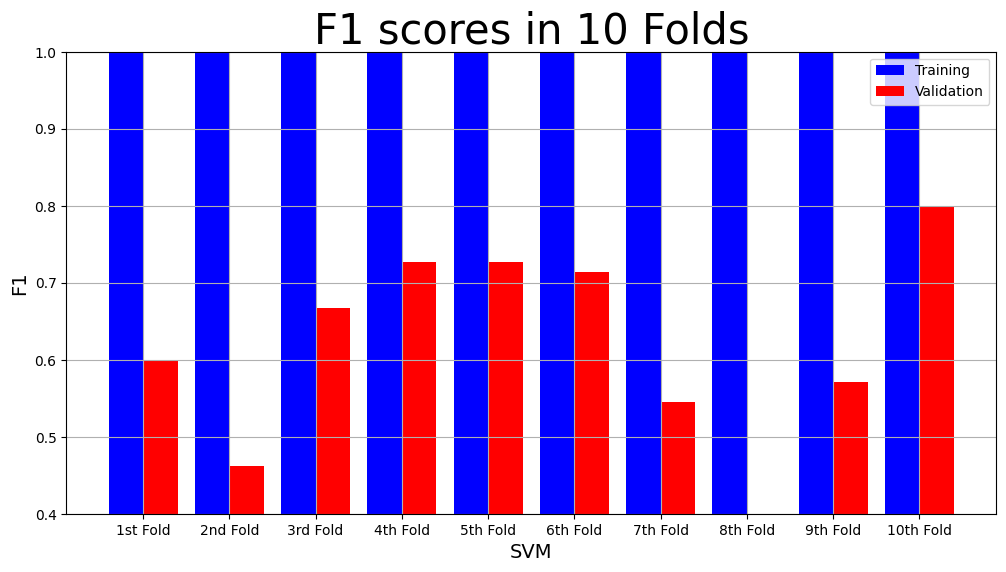

In [ ]:
model_name = "SVM"
plot_result(model_name,
            "F1",
            "F1 scores in 10 Folds",
            svm_result["Training F1 scores"],
            svm_result["Validation F1 scores"])

### 2.1 shuffled IES -> personality

In [ ]:
#define the model #X_IES_random
svm = LinearSVC(max_iter=100000)
#perform cross validation with model


#y_A
svm_result = cross_validation(svm, X_IES_random, y_A, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

The main results are 
 Mean Validation F1: 0.534978354978355 
 Mean Validation Accuracy 56.33333333333334


{'Training Accuracy scores': array([0.61363636, 0.61363636, 0.60227273, 0.61363636, 0.65909091,
        0.60227273, 0.60227273, 0.59090909, 0.61797753, 0.57303371]),
 'Mean Training Accuracy': 60.8873850868233,
 'Training Precision scores': array([0.62790698, 0.65714286, 0.61904762, 0.63414634, 0.7027027 ,
        0.61904762, 0.63157895, 0.61538462, 0.64102564, 0.58974359]),
 'Mean Training Precision': 0.6337726909670667,
 'Training Recall scores': array([0.6       , 0.51111111, 0.57777778, 0.57777778, 0.57777778,
        0.57777778, 0.53333333, 0.53333333, 0.55555556, 0.51111111]),
 'Mean Training Recall': 0.5555555555555556,
 'Training F1 scores': array([0.61363636, 0.575     , 0.59770115, 0.60465116, 0.63414634,
        0.59770115, 0.57831325, 0.57142857, 0.5952381 , 0.54761905]),
 'Mean Training F1 Score': 0.5915435134038812,
 'Validation Accuracy scores': array([0.8       , 0.5       , 0.4       , 0.4       , 0.4       ,
        0.4       , 0.7       , 0.7       , 0.44444444, 0.88

In [ ]:
#y_O
svm = LinearSVC(max_iter=100000)
#perform cross validation with model


svm_result = cross_validation(svm, X_IES_random, y_O, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

The main results are 
 Mean Validation F1: 0.557965367965368 
 Mean Validation Accuracy 59.77777777777777


{'Training Accuracy scores': array([0.63636364, 0.65909091, 0.71590909, 0.625     , 0.68181818,
        0.64772727, 0.72727273, 0.70454545, 0.68539326, 0.66292135]),
 'Mean Training Accuracy': 67.46041879468847,
 'Training Precision scores': array([0.66666667, 0.7027027 , 0.76315789, 0.65      , 0.69767442,
        0.68421053, 0.76923077, 0.74358974, 0.72972973, 0.7027027 ]),
 'Mean Training Precision': 0.7109665154279597,
 'Training Recall scores': array([0.57777778, 0.57777778, 0.64444444, 0.57777778, 0.66666667,
        0.57777778, 0.66666667, 0.64444444, 0.6       , 0.57777778]),
 'Mean Training Recall': 0.611111111111111,
 'Training F1 scores': array([0.61904762, 0.63414634, 0.69879518, 0.61176471, 0.68181818,
        0.62650602, 0.71428571, 0.69047619, 0.65853659, 0.63414634]),
 'Mean Training F1 Score': 0.6569522884622018,
 'Validation Accuracy scores': array([0.7       , 0.7       , 0.6       , 0.8       , 0.4       ,
        0.8       , 0.4       , 0.8       , 0.44444444, 0.33

In [ ]:
#y_C
svm = LinearSVC(max_iter=100000)
#perform cross validation with model


svm_result = cross_validation(svm, X_IES_random, y_C, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

The main results are 
 Mean Validation F1: 0.5677489177489178 
 Mean Validation Accuracy 50.777777777777786


{'Training Accuracy scores': array([0.61363636, 0.625     , 0.61363636, 0.59090909, 0.625     ,
        0.625     , 0.59090909, 0.57954545, 0.66292135, 0.65168539]),
 'Mean Training Accuracy': 61.78243105209397,
 'Training Precision scores': array([0.61538462, 0.62264151, 0.61016949, 0.59322034, 0.625     ,
        0.625     , 0.59322034, 0.59615385, 0.64912281, 0.63793103]),
 'Mean Training Precision': 0.6167843981964252,
 'Training Recall scores': array([0.69565217, 0.7173913 , 0.76595745, 0.74468085, 0.74468085,
        0.74468085, 0.74468085, 0.65957447, 0.78723404, 0.78723404]),
 'Mean Training Recall': 0.7391766882516189,
 'Training F1 scores': array([0.65306122, 0.66666667, 0.67924528, 0.66037736, 0.67961165,
        0.67961165, 0.66037736, 0.62626263, 0.71153846, 0.7047619 ]),
 'Mean Training F1 Score': 0.6721514184690329,
 'Validation Accuracy scores': array([0.6       , 0.4       , 0.7       , 0.4       , 0.6       ,
        0.5       , 0.5       , 0.6       , 0.22222222, 0.5

In [ ]:
#y_N
svm = LinearSVC(max_iter=90000)
#perform cross validation with model


svm_result = cross_validation(svm, X_IES_random, y_N, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

The main results are 
 Mean Validation F1: 0.5483605283605283 
 Mean Validation Accuracy 50.22222222222222


{'Training Accuracy scores': array([0.61363636, 0.57954545, 0.60227273, 0.53409091, 0.59090909,
        0.56818182, 0.51136364, 0.55681818, 0.58426966, 0.56179775]),
 'Mean Training Accuracy': 57.02885597548518,
 'Training Precision scores': array([0.63265306, 0.58928571, 0.60344828, 0.55172414, 0.59322034,
        0.58181818, 0.52727273, 0.56140351, 0.59259259, 0.57142857]),
 'Mean Training Precision': 0.5804847110170361,
 'Training Recall scores': array([0.65957447, 0.70212766, 0.74468085, 0.68085106, 0.74468085,
        0.68085106, 0.63043478, 0.69565217, 0.68085106, 0.68085106]),
 'Mean Training Recall': 0.6900555041628122,
 'Training F1 scores': array([0.64583333, 0.6407767 , 0.66666667, 0.60952381, 0.66037736,
        0.62745098, 0.57425743, 0.62135922, 0.63366337, 0.62135922]),
 'Mean Training F1 Score': 0.6301268086116807,
 'Validation Accuracy scores': array([0.4       , 0.4       , 0.2       , 0.7       , 0.4       ,
        0.7       , 0.5       , 0.5       , 0.55555556, 0.6

In [ ]:
#y_E
svm = LinearSVC(max_iter=90000)
#perform cross validation with model


svm_result = cross_validation(svm, X_IES_random, y_E, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

The main results are 
 Mean Validation F1: 0.5953535353535353 
 Mean Validation Accuracy 60.44444444444444


{'Training Accuracy scores': array([0.68181818, 0.67045455, 0.68181818, 0.63636364, 0.75      ,
        0.64772727, 0.63636364, 0.64772727, 0.69662921, 0.65168539]),
 'Mean Training Accuracy': 67.00587334014301,
 'Training Precision scores': array([0.70731707, 0.68085106, 0.69565217, 0.66666667, 0.76086957,
        0.65306122, 0.68421053, 0.65957447, 0.72093023, 0.64705882]),
 'Mean Training Precision': 0.6876191817775863,
 'Training Recall scores': array([0.64444444, 0.69565217, 0.69565217, 0.60869565, 0.76086957,
        0.69565217, 0.56521739, 0.67391304, 0.67391304, 0.7173913 ]),
 'Mean Training Recall': 0.6731400966183575,
 'Training F1 scores': array([0.6744186 , 0.68817204, 0.69565217, 0.63636364, 0.76086957,
        0.67368421, 0.61904762, 0.66666667, 0.69662921, 0.68041237]),
 'Mean Training F1 Score': 0.6791916104013757,
 'Validation Accuracy scores': array([0.6       , 0.6       , 0.6       , 0.6       , 0.4       ,
        0.6       , 0.5       , 0.7       , 0.55555556, 0.8

### 2.2 IES + shuffled BOLD -> personality


In [ ]:
#y_A
svm = LinearSVC(max_iter=90000)
#perform cross validation with model


svm_result = cross_validation(svm, X_IES_BOLD_shuf, y_A, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

The main results are 
 Mean Validation F1: 0.5468181818181819 
 Mean Validation Accuracy 53.222222222222214


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Training Accuracy scores': array([0.71590909, 0.78409091, 0.76136364, 0.80681818, 0.72727273,
        0.71590909, 0.72727273, 0.77272727, 0.73033708, 0.7752809 ]),
 'Mean Training Accuracy': 75.16981613891727,
 'Training Precision scores': array([0.73809524, 0.7826087 , 0.77272727, 0.81818182, 0.75609756,
        0.72727273, 0.75609756, 0.79069767, 0.73333333, 0.79069767]),
 'Mean Training Precision': 0.7665809556050992,
 'Training Recall scores': array([0.68888889, 0.8       , 0.75555556, 0.8       , 0.68888889,
        0.71111111, 0.68888889, 0.75555556, 0.73333333, 0.75555556]),
 'Mean Training Recall': 0.7377777777777778,
 'Training F1 scores': array([0.71264368, 0.79120879, 0.76404494, 0.80898876, 0.72093023,
        0.71910112, 0.72093023, 0.77272727, 0.73333333, 0.77272727]),
 'Mean Training F1 Score': 0.7516635644734542,
 'Validation Accuracy scores': array([0.8       , 0.5       , 0.5       , 0.5       , 0.7       ,
        0.4       , 0.3       , 0.4       , 0.55555556, 0.6

In [ ]:
#y_O
svm = LinearSVC(max_iter=90000)
#perform cross validation with model


svm_result = cross_validation(svm, X_IES_BOLD_shuf, y_O, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

The main results are 
 Mean Validation F1: 0.4716666666666667 
 Mean Validation Accuracy 50.22222222222222


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Training Accuracy scores': array([0.67045455, 0.68181818, 0.67045455, 0.64772727, 0.70454545,
        0.70454545, 0.70454545, 0.61363636, 0.68539326, 0.66292135]),
 'Mean Training Accuracy': 67.46041879468845,
 'Training Precision scores': array([0.67391304, 0.70731707, 0.67391304, 0.66666667, 0.74358974,
        0.72093023, 0.74358974, 0.62222222, 0.71794872, 0.69230769]),
 'Mean Training Precision': 0.696239817901018,
 'Training Recall scores': array([0.68888889, 0.64444444, 0.68888889, 0.62222222, 0.64444444,
        0.68888889, 0.64444444, 0.62222222, 0.62222222, 0.6       ]),
 'Mean Training Recall': 0.6466666666666667,
 'Training F1 scores': array([0.68131868, 0.6744186 , 0.68131868, 0.64367816, 0.69047619,
        0.70454545, 0.69047619, 0.62222222, 0.66666667, 0.64285714]),
 'Mean Training F1 Score': 0.6697977995451934,
 'Validation Accuracy scores': array([0.6       , 0.6       , 0.4       , 0.4       , 0.2       ,
        0.5       , 0.3       , 0.8       , 0.55555556, 0.66

In [ ]:
#y_C
svm = LinearSVC(max_iter=90000)
#perform cross validation with model


svm_result = cross_validation(svm, X_IES_BOLD_shuf, y_C, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

The main results are 
 Mean Validation F1: 0.5663869463869464 
 Mean Validation Accuracy 51.77777777777778


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Training Accuracy scores': array([0.68181818, 0.70454545, 0.69318182, 0.70454545, 0.70454545,
        0.63636364, 0.64772727, 0.72727273, 0.70786517, 0.76404494]),
 'Mean Training Accuracy': 69.71910112359551,
 'Training Precision scores': array([0.6875    , 0.7173913 , 0.7       , 0.71428571, 0.71428571,
        0.65957447, 0.65384615, 0.70909091, 0.72340426, 0.77083333]),
 'Mean Training Precision': 0.7050211852593906,
 'Training Recall scores': array([0.7173913 , 0.7173913 , 0.74468085, 0.74468085, 0.74468085,
        0.65957447, 0.72340426, 0.82978723, 0.72340426, 0.78723404]),
 'Mean Training Recall': 0.7392229417206291,
 'Training F1 scores': array([0.70212766, 0.7173913 , 0.72164948, 0.72916667, 0.72916667,
        0.65957447, 0.68686869, 0.76470588, 0.72340426, 0.77894737]),
 'Mean Training F1 Score': 0.7213002442838645,
 'Validation Accuracy scores': array([0.9       , 0.3       , 0.5       , 0.8       , 0.4       ,
        0.5       , 0.4       , 0.6       , 0.55555556, 0.2

In [ ]:
#y_N
svm = LinearSVC(max_iter=90000)
#perform cross validation with model


svm_result = cross_validation(svm, X_IES_BOLD_shuf, y_N, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

The main results are 
 Mean Validation F1: 0.5371212121212121 
 Mean Validation Accuracy 53.0


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Training Accuracy scores': array([0.71590909, 0.67045455, 0.71590909, 0.75      , 0.75      ,
        0.70454545, 0.65909091, 0.70454545, 0.71910112, 0.70786517]),
 'Mean Training Accuracy': 70.97420837589377,
 'Training Precision scores': array([0.73913043, 0.6875    , 0.72916667, 0.74509804, 0.76595745,
        0.73333333, 0.66666667, 0.72727273, 0.73913043, 0.72340426]),
 'Mean Training Precision': 0.7256660004847958,
 'Training Recall scores': array([0.72340426, 0.70212766, 0.74468085, 0.80851064, 0.76595745,
        0.70212766, 0.69565217, 0.69565217, 0.72340426, 0.72340426]),
 'Mean Training Recall': 0.7284921369102684,
 'Training F1 scores': array([0.7311828 , 0.69473684, 0.73684211, 0.7755102 , 0.76595745,
        0.7173913 , 0.68085106, 0.71111111, 0.7311828 , 0.72340426]),
 'Mean Training F1 Score': 0.7268169924264287,
 'Validation Accuracy scores': array([0.4       , 0.7       , 0.5       , 0.5       , 0.5       ,
        0.6       , 0.7       , 0.4       , 0.66666667, 0.3

In [ ]:
#y_E
svm = LinearSVC(max_iter=90000)
#perform cross validation with model


svm_result = cross_validation(svm, X_IES_BOLD_shuf, y_E, num_folds)

print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")
svm_result

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

The main results are 
 Mean Validation F1: 0.5428421578421577 
 Mean Validation Accuracy 51.33333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Training Accuracy scores': array([0.65909091, 0.67045455, 0.69318182, 0.69318182, 0.70454545,
        0.69318182, 0.68181818, 0.76136364, 0.68539326, 0.66292135]),
 'Mean Training Accuracy': 69.05132788559754,
 'Training Precision scores': array([0.65957447, 0.68085106, 0.69387755, 0.67924528, 0.69230769,
        0.68627451, 0.68      , 0.75510204, 0.68      , 0.66666667]),
 'Mean Training Precision': 0.6873899275548776,
 'Training Recall scores': array([0.68888889, 0.69565217, 0.73913043, 0.7826087 , 0.7826087 ,
        0.76086957, 0.73913043, 0.80434783, 0.73913043, 0.69565217]),
 'Mean Training Recall': 0.7428019323671498,
 'Training F1 scores': array([0.67391304, 0.68817204, 0.71578947, 0.72727273, 0.73469388,
        0.72164948, 0.70833333, 0.77894737, 0.70833333, 0.68085106]),
 'Mean Training F1 Score': 0.713795574845056,
 'Validation Accuracy scores': array([0.5       , 0.6       , 0.4       , 0.3       , 0.3       ,
        0.8       , 0.4       , 0.5       , 0.66666667, 0.66

## Logistic Regression
---

### 1.1 IES -> personality

In [ ]:
from sklearn.linear_model import LogisticRegression
#define the model
logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model

#y_A
logis_result = cross_validation(logis_reg_model, X_IES, y_A, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.6001554001554001 
 Mean Validation Accuracy 56.33333333333332


{'Training Accuracy scores': array([0.64772727, 0.67045455, 0.70454545, 0.64772727, 0.67045455,
        0.69318182, 0.68181818, 0.65909091, 0.60674157, 0.64044944]),
 'Mean Training Accuracy': 66.22191011235955,
 'Training Precision scores': array([0.64583333, 0.65384615, 0.70212766, 0.65217391, 0.68181818,
        0.6875    , 0.66666667, 0.66666667, 0.60416667, 0.63829787]),
 'Mean Training Precision': 0.6599097113956041,
 'Training Recall scores': array([0.68888889, 0.75555556, 0.73333333, 0.66666667, 0.66666667,
        0.73333333, 0.75555556, 0.66666667, 0.64444444, 0.66666667]),
 'Mean Training Recall': 0.6977777777777778,
 'Training F1 scores': array([0.66666667, 0.70103093, 0.7173913 , 0.65934066, 0.6741573 ,
        0.70967742, 0.70833333, 0.66666667, 0.62365591, 0.65217391]),
 'Mean Training F1 Score': 0.6779094107937802,
 'Validation Accuracy scores': array([0.6       , 0.5       , 0.3       , 0.5       , 0.7       ,
        0.5       , 0.6       , 0.6       , 0.77777778, 0.5

In [ ]:
#y_O

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES, y_O, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5536285936285936 
 Mean Validation Accuracy 52.33333333333333


{'Training Accuracy scores': array([0.57954545, 0.59090909, 0.59090909, 0.625     , 0.61363636,
        0.56818182, 0.60227273, 0.55681818, 0.56179775, 0.5505618 ]),
 'Mean Training Accuracy': 58.396322778345244,
 'Training Precision scores': array([0.58695652, 0.58823529, 0.58823529, 0.61538462, 0.62790698,
        0.58139535, 0.61363636, 0.55769231, 0.56521739, 0.55102041]),
 'Mean Training Precision': 0.5875680521736719,
 'Training Recall scores': array([0.6       , 0.66666667, 0.66666667, 0.71111111, 0.6       ,
        0.55555556, 0.6       , 0.64444444, 0.57777778, 0.6       ]),
 'Mean Training Recall': 0.6222222222222221,
 'Training F1 scores': array([0.59340659, 0.625     , 0.625     , 0.65979381, 0.61363636,
        0.56818182, 0.60674157, 0.59793814, 0.57142857, 0.57446809]),
 'Mean Training F1 Score': 0.6035594963556323,
 'Validation Accuracy scores': array([0.3       , 0.6       , 0.8       , 0.5       , 0.3       ,
        0.4       , 0.4       , 0.6       , 0.77777778, 0.

In [ ]:
#y_C

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES, y_C, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5348140748140748 
 Mean Validation Accuracy 43.88888888888889


{'Training Accuracy scores': array([0.57954545, 0.57954545, 0.61363636, 0.52272727, 0.54545455,
        0.52272727, 0.59090909, 0.59090909, 0.58426966, 0.62921348]),
 'Mean Training Accuracy': 57.5893769152196,
 'Training Precision scores': array([0.57377049, 0.58181818, 0.60655738, 0.53731343, 0.55737705,
        0.54385965, 0.60377358, 0.59322034, 0.58064516, 0.62068966]),
 'Mean Training Precision': 0.5799024922161045,
 'Training Recall scores': array([0.76086957, 0.69565217, 0.78723404, 0.76595745, 0.72340426,
        0.65957447, 0.68085106, 0.74468085, 0.76595745, 0.76595745]),
 'Mean Training Recall': 0.735013876040703,
 'Training F1 scores': array([0.65420561, 0.63366337, 0.68518519, 0.63157895, 0.62962963,
        0.59615385, 0.64      , 0.66037736, 0.66055046, 0.68571429]),
 'Mean Training F1 Score': 0.6477058685070799,
 'Validation Accuracy scores': array([0.6       , 0.2       , 0.4       , 0.6       , 0.4       ,
        0.5       , 0.4       , 0.4       , 0.44444444, 0.444

In [ ]:
#y_N

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES, y_N, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5056277056277056 
 Mean Validation Accuracy 48.111111111111114


{'Training Accuracy scores': array([0.60227273, 0.60227273, 0.57954545, 0.61363636, 0.59090909,
        0.60227273, 0.61363636, 0.61363636, 0.60674157, 0.58426966]),
 'Mean Training Accuracy': 60.09193054136874,
 'Training Precision scores': array([0.625     , 0.62      , 0.59615385, 0.63265306, 0.61702128,
        0.63043478, 0.63043478, 0.63043478, 0.625     , 0.59615385]),
 'Mean Training Precision': 0.6203286377954014,
 'Training Recall scores': array([0.63829787, 0.65957447, 0.65957447, 0.65957447, 0.61702128,
        0.61702128, 0.63043478, 0.63043478, 0.63829787, 0.65957447]),
 'Mean Training Recall': 0.6409805735430156,
 'Training F1 scores': array([0.63157895, 0.63917526, 0.62626263, 0.64583333, 0.61702128,
        0.62365591, 0.63043478, 0.63043478, 0.63157895, 0.62626263]),
 'Mean Training F1 Score': 0.6302238494119017,
 'Validation Accuracy scores': array([0.5       , 0.4       , 0.3       , 0.5       , 0.6       ,
        0.4       , 0.6       , 0.4       , 0.44444444, 0.6

In [ ]:
#y_E

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES, y_E, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5864657564657565 
 Mean Validation Accuracy 52.22222222222223


{'Training Accuracy scores': array([0.60227273, 0.57954545, 0.625     , 0.60227273, 0.63636364,
        0.59090909, 0.55681818, 0.625     , 0.59550562, 0.62921348]),
 'Mean Training Accuracy': 60.42900919305414,
 'Training Precision scores': array([0.59259259, 0.57627119, 0.61016949, 0.59322034, 0.625     ,
        0.59615385, 0.55737705, 0.62264151, 0.58928571, 0.61403509]),
 'Mean Training Precision': 0.5976746816314893,
 'Training Recall scores': array([0.71111111, 0.73913043, 0.7826087 , 0.76086957, 0.76086957,
        0.67391304, 0.73913043, 0.7173913 , 0.7173913 , 0.76086957]),
 'Mean Training Recall': 0.736328502415459,
 'Training F1 scores': array([0.64646465, 0.64761905, 0.68571429, 0.66666667, 0.68627451,
        0.63265306, 0.63551402, 0.66666667, 0.64705882, 0.67961165]),
 'Mean Training F1 Score': 0.6594243376866162,
 'Validation Accuracy scores': array([0.7       , 0.6       , 0.3       , 0.3       , 0.4       ,
        0.6       , 0.6       , 0.5       , 0.77777778, 0.44

### 1.2 IES + relevant BOLD -> personality

In [ ]:
#y_A

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_combined, y_A, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5623232323232324 
 Mean Validation Accuracy 54.33333333333334


{'Training Accuracy scores': array([0.72727273, 0.76136364, 0.76136364, 0.81818182, 0.72727273,
        0.70454545, 0.71590909, 0.77272727, 0.73033708, 0.76404494]),
 'Mean Training Accuracy': 74.83018386108274,
 'Training Precision scores': array([0.73333333, 0.76086957, 0.75      , 0.8372093 , 0.75609756,
        0.72093023, 0.73809524, 0.77777778, 0.73333333, 0.78571429]),
 'Mean Training Precision': 0.759336062933069,
 'Training Recall scores': array([0.73333333, 0.77777778, 0.8       , 0.8       , 0.68888889,
        0.68888889, 0.68888889, 0.77777778, 0.73333333, 0.73333333]),
 'Mean Training Recall': 0.7422222222222222,
 'Training F1 scores': array([0.73333333, 0.76923077, 0.77419355, 0.81818182, 0.72093023,
        0.70454545, 0.71264368, 0.77777778, 0.73333333, 0.75862069]),
 'Mean Training F1 Score': 0.7502790635163815,
 'Validation Accuracy scores': array([0.9       , 0.3       , 0.5       , 0.5       , 0.7       ,
        0.4       , 0.4       , 0.4       , 0.66666667, 0.66

In [ ]:
#y_O

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_combined, y_O, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")

logis_result

The main results are 
 Mean Validation F1: 0.4307575757575758 
 Mean Validation Accuracy 47.0


{'Training Accuracy scores': array([0.63636364, 0.68181818, 0.69318182, 0.67045455, 0.71590909,
        0.71590909, 0.73863636, 0.65909091, 0.66292135, 0.66292135]),
 'Mean Training Accuracy': 68.3720633299285,
 'Training Precision scores': array([0.63265306, 0.70731707, 0.69565217, 0.67391304, 0.73809524,
        0.72727273, 0.76190476, 0.65957447, 0.6744186 , 0.6744186 ]),
 'Mean Training Precision': 0.6945219756446686,
 'Training Recall scores': array([0.68888889, 0.64444444, 0.71111111, 0.68888889, 0.68888889,
        0.71111111, 0.71111111, 0.68888889, 0.64444444, 0.64444444]),
 'Mean Training Recall': 0.6822222222222223,
 'Training F1 scores': array([0.65957447, 0.6744186 , 0.7032967 , 0.68131868, 0.71264368,
        0.71910112, 0.73563218, 0.67391304, 0.65909091, 0.65909091]),
 'Mean Training F1 Score': 0.6878080304676203,
 'Validation Accuracy scores': array([0.5       , 0.6       , 0.2       , 0.4       , 0.2       ,
        0.6       , 0.4       , 0.8       , 0.44444444, 0.55

In [ ]:
#y_C

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_combined, y_C, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")

logis_result

The main results are 
 Mean Validation F1: 0.5800233100233101 
 Mean Validation Accuracy 52.888888888888886


{'Training Accuracy scores': array([0.65909091, 0.69318182, 0.70454545, 0.70454545, 0.70454545,
        0.64772727, 0.68181818, 0.71590909, 0.70786517, 0.74157303]),
 'Mean Training Accuracy': 69.60801838610827,
 'Training Precision scores': array([0.66666667, 0.71111111, 0.71428571, 0.71428571, 0.71428571,
        0.66666667, 0.68627451, 0.69642857, 0.72340426, 0.75      ]),
 'Mean Training Precision': 0.7043408923853229,
 'Training Recall scores': array([0.69565217, 0.69565217, 0.74468085, 0.74468085, 0.74468085,
        0.68085106, 0.74468085, 0.82978723, 0.72340426, 0.76595745]),
 'Mean Training Recall': 0.7370027752081406,
 'Training F1 scores': array([0.68085106, 0.7032967 , 0.72916667, 0.72916667, 0.72916667,
        0.67368421, 0.71428571, 0.75728155, 0.72340426, 0.75789474]),
 'Mean Training F1 Score': 0.7198198237497834,
 'Validation Accuracy scores': array([0.9       , 0.3       , 0.5       , 0.8       , 0.4       ,
        0.5       , 0.4       , 0.6       , 0.55555556, 0.3

In [ ]:
#y_N

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_combined, y_N, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")

logis_result

The main results are 
 Mean Validation F1: 0.5598484848484848 
 Mean Validation Accuracy 55.00000000000001


{'Training Accuracy scores': array([0.69318182, 0.67045455, 0.70454545, 0.76136364, 0.73863636,
        0.70454545, 0.67045455, 0.73863636, 0.68539326, 0.73033708]),
 'Mean Training Accuracy': 70.97548518896834,
 'Training Precision scores': array([0.7       , 0.6875    , 0.71428571, 0.76      , 0.74      ,
        0.71428571, 0.68085106, 0.74468085, 0.71111111, 0.74468085]),
 'Mean Training Precision': 0.7197395305639986,
 'Training Recall scores': array([0.74468085, 0.70212766, 0.74468085, 0.80851064, 0.78723404,
        0.74468085, 0.69565217, 0.76086957, 0.68085106, 0.74468085]),
 'Mean Training Recall': 0.7413968547641073,
 'Training F1 scores': array([0.72164948, 0.69473684, 0.72916667, 0.78350515, 0.7628866 ,
        0.72916667, 0.68817204, 0.75268817, 0.69565217, 0.74468085]),
 'Mean Training F1 Score': 0.7302304652582635,
 'Validation Accuracy scores': array([0.4       , 0.7       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.9       , 0.5       , 0.66666667, 0.3

In [ ]:
#y_E

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_combined, y_E, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")

logis_result

The main results are 
 Mean Validation F1: 0.5271855921855921 
 Mean Validation Accuracy 50.22222222222222


{'Training Accuracy scores': array([0.64772727, 0.65909091, 0.69318182, 0.70454545, 0.67045455,
        0.67045455, 0.68181818, 0.76136364, 0.66292135, 0.6741573 ]),
 'Mean Training Accuracy': 68.25715015321757,
 'Training Precision scores': array([0.65217391, 0.67391304, 0.68627451, 0.69230769, 0.68085106,
        0.67346939, 0.68      , 0.76595745, 0.66      , 0.66666667]),
 'Mean Training Precision': 0.6831613723693419,
 'Training Recall scores': array([0.66666667, 0.67391304, 0.76086957, 0.7826087 , 0.69565217,
        0.7173913 , 0.73913043, 0.7826087 , 0.7173913 , 0.73913043]),
 'Mean Training Recall': 0.727536231884058,
 'Training F1 scores': array([0.65934066, 0.67391304, 0.72164948, 0.73469388, 0.68817204,
        0.69473684, 0.70833333, 0.77419355, 0.6875    , 0.70103093]),
 'Mean Training F1 Score': 0.704356375957752,
 'Validation Accuracy scores': array([0.4       , 0.6       , 0.4       , 0.3       , 0.3       ,
        0.8       , 0.4       , 0.6       , 0.66666667, 0.555

### 2.1 shuffled IES -> personality

In [ ]:
#y_A

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES_random, y_A, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5549728049728049 
 Mean Validation Accuracy 52.77777777777778


{'Training Accuracy scores': array([0.56818182, 0.57954545, 0.61363636, 0.55681818, 0.56818182,
        0.57954545, 0.57954545, 0.55681818, 0.59550562, 0.57303371]),
 'Mean Training Accuracy': 57.708120531154236,
 'Training Precision scores': array([0.56603774, 0.57692308, 0.61702128, 0.55172414, 0.57142857,
        0.57142857, 0.58      , 0.55769231, 0.59574468, 0.56862745]),
 'Mean Training Precision': 0.5756627809679818,
 'Training Recall scores': array([0.66666667, 0.66666667, 0.64444444, 0.71111111, 0.62222222,
        0.71111111, 0.64444444, 0.64444444, 0.62222222, 0.64444444]),
 'Mean Training Recall': 0.6577777777777778,
 'Training F1 scores': array([0.6122449 , 0.6185567 , 0.63043478, 0.62135922, 0.59574468,
        0.63366337, 0.61052632, 0.59793814, 0.60869565, 0.60416667]),
 'Mean Training F1 Score': 0.6133330431047426,
 'Validation Accuracy scores': array([0.5       , 0.6       , 0.5       , 0.6       , 0.6       ,
        0.6       , 0.5       , 0.6       , 0.44444444, 0.

In [ ]:
#y_O

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES_random, y_O, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5517782217782219 
 Mean Validation Accuracy 50.0


{'Training Accuracy scores': array([0.64772727, 0.59090909, 0.56818182, 0.60227273, 0.59090909,
        0.61363636, 0.625     , 0.64772727, 0.5505618 , 0.58426966]),
 'Mean Training Accuracy': 60.211950970377934,
 'Training Precision scores': array([0.64      , 0.58490566, 0.56363636, 0.59259259, 0.58823529,
        0.61702128, 0.61538462, 0.63461538, 0.54901961, 0.58333333]),
 'Mean Training Precision': 0.5968744128496176,
 'Training Recall scores': array([0.71111111, 0.68888889, 0.68888889, 0.71111111, 0.66666667,
        0.64444444, 0.71111111, 0.73333333, 0.62222222, 0.62222222]),
 'Mean Training Recall': 0.6799999999999999,
 'Training F1 scores': array([0.67368421, 0.63265306, 0.62      , 0.64646465, 0.625     ,
        0.63043478, 0.65979381, 0.68041237, 0.58333333, 0.60215054]),
 'Mean Training F1 Score': 0.6353926757358901,
 'Validation Accuracy scores': array([0.5       , 0.6       , 0.5       , 0.3       , 0.6       ,
        0.4       , 0.8       , 0.3       , 0.55555556, 0.

In [ ]:
#y_C

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES_random, y_C, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.47019813519813525 
 Mean Validation Accuracy 42.8888888888889


{'Training Accuracy scores': array([0.59090909, 0.55681818, 0.55681818, 0.53409091, 0.48863636,
        0.59090909, 0.57954545, 0.54545455, 0.56179775, 0.56179775]),
 'Mean Training Accuracy': 55.66777323799796,
 'Training Precision scores': array([0.59259259, 0.57142857, 0.57407407, 0.55769231, 0.51785714,
        0.60377358, 0.59615385, 0.56140351, 0.57407407, 0.57692308]),
 'Mean Training Precision': 0.5725972779473276,
 'Training Recall scores': array([0.69565217, 0.60869565, 0.65957447, 0.61702128, 0.61702128,
        0.68085106, 0.65957447, 0.68085106, 0.65957447, 0.63829787]),
 'Mean Training Recall': 0.6517113783533764,
 'Training F1 scores': array([0.64      , 0.58947368, 0.61386139, 0.58585859, 0.5631068 ,
        0.64      , 0.62626263, 0.61538462, 0.61386139, 0.60606061]),
 'Mean Training F1 Score': 0.6093869686170692,
 'Validation Accuracy scores': array([0.2       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.3       , 0.5       , 0.4       , 0.33333333, 0.5

In [ ]:
#y_N

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES_random, y_N, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5247585747585748 
 Mean Validation Accuracy 44.666666666666664


{'Training Accuracy scores': array([0.61363636, 0.54545455, 0.59090909, 0.55681818, 0.64772727,
        0.54545455, 0.56818182, 0.57954545, 0.70786517, 0.60674157]),
 'Mean Training Accuracy': 59.623340143003055,
 'Training Precision scores': array([0.61818182, 0.56140351, 0.59649123, 0.56896552, 0.62903226,
        0.55555556, 0.57142857, 0.57894737, 0.67213115, 0.59677419]),
 'Mean Training Precision': 0.5948911166824369,
 'Training Recall scores': array([0.72340426, 0.68085106, 0.72340426, 0.70212766, 0.82978723,
        0.74468085, 0.69565217, 0.7173913 , 0.87234043, 0.78723404]),
 'Mean Training Recall': 0.7476873265494912,
 'Training F1 scores': array([0.66666667, 0.61538462, 0.65384615, 0.62857143, 0.71559633,
        0.63636364, 0.62745098, 0.6407767 , 0.75925926, 0.67889908]),
 'Mean Training F1 Score': 0.662281485235708,
 'Validation Accuracy scores': array([0.4       , 0.6       , 0.3       , 0.5       , 0.5       ,
        0.4       , 0.7       , 0.4       , 0.11111111, 0.5

In [ ]:
#y_E

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES_random, y_E, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5758008658008658 
 Mean Validation Accuracy 54.22222222222223


{'Training Accuracy scores': array([0.625     , 0.625     , 0.63636364, 0.57954545, 0.63636364,
        0.61363636, 0.67045455, 0.65909091, 0.59550562, 0.61797753]),
 'Mean Training Accuracy': 62.58937691521961,
 'Training Precision scores': array([0.63043478, 0.63265306, 0.64      , 0.58823529, 0.65217391,
        0.625     , 0.67346939, 0.67391304, 0.6       , 0.63043478]),
 'Mean Training Precision': 0.6346314264836368,
 'Training Recall scores': array([0.64444444, 0.67391304, 0.69565217, 0.65217391, 0.65217391,
        0.65217391, 0.7173913 , 0.67391304, 0.65217391, 0.63043478]),
 'Mean Training Recall': 0.6644444444444444,
 'Training F1 scores': array([0.63736264, 0.65263158, 0.66666667, 0.6185567 , 0.65217391,
        0.63829787, 0.69473684, 0.67391304, 0.625     , 0.63043478]),
 'Mean Training F1 Score': 0.6489774037583723,
 'Validation Accuracy scores': array([0.5       , 0.6       , 0.6       , 0.7       , 0.4       ,
        0.6       , 0.3       , 0.5       , 0.55555556, 0.6

### 2.2 IES + shuffled BOLD -> personality

In [ ]:
#y_A

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES_BOLD_shuf, y_A, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5623232323232324 
 Mean Validation Accuracy 54.33333333333334


{'Training Accuracy scores': array([0.72727273, 0.76136364, 0.76136364, 0.81818182, 0.72727273,
        0.70454545, 0.71590909, 0.77272727, 0.73033708, 0.76404494]),
 'Mean Training Accuracy': 74.83018386108274,
 'Training Precision scores': array([0.73333333, 0.76086957, 0.75      , 0.8372093 , 0.75609756,
        0.72093023, 0.73809524, 0.77777778, 0.73333333, 0.78571429]),
 'Mean Training Precision': 0.759336062933069,
 'Training Recall scores': array([0.73333333, 0.77777778, 0.8       , 0.8       , 0.68888889,
        0.68888889, 0.68888889, 0.77777778, 0.73333333, 0.73333333]),
 'Mean Training Recall': 0.7422222222222222,
 'Training F1 scores': array([0.73333333, 0.76923077, 0.77419355, 0.81818182, 0.72093023,
        0.70454545, 0.71264368, 0.77777778, 0.73333333, 0.75862069]),
 'Mean Training F1 Score': 0.7502790635163815,
 'Validation Accuracy scores': array([0.9       , 0.3       , 0.5       , 0.5       , 0.7       ,
        0.4       , 0.4       , 0.4       , 0.66666667, 0.66

In [ ]:
#y_O

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES_BOLD_shuf, y_O, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.4307575757575758 
 Mean Validation Accuracy 47.0


{'Training Accuracy scores': array([0.63636364, 0.68181818, 0.69318182, 0.67045455, 0.71590909,
        0.71590909, 0.73863636, 0.65909091, 0.66292135, 0.66292135]),
 'Mean Training Accuracy': 68.3720633299285,
 'Training Precision scores': array([0.63265306, 0.70731707, 0.69565217, 0.67391304, 0.73809524,
        0.72727273, 0.76190476, 0.65957447, 0.6744186 , 0.6744186 ]),
 'Mean Training Precision': 0.6945219756446686,
 'Training Recall scores': array([0.68888889, 0.64444444, 0.71111111, 0.68888889, 0.68888889,
        0.71111111, 0.71111111, 0.68888889, 0.64444444, 0.64444444]),
 'Mean Training Recall': 0.6822222222222223,
 'Training F1 scores': array([0.65957447, 0.6744186 , 0.7032967 , 0.68131868, 0.71264368,
        0.71910112, 0.73563218, 0.67391304, 0.65909091, 0.65909091]),
 'Mean Training F1 Score': 0.6878080304676203,
 'Validation Accuracy scores': array([0.5       , 0.6       , 0.2       , 0.4       , 0.2       ,
        0.6       , 0.4       , 0.8       , 0.44444444, 0.55

In [ ]:
#y_C

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES_BOLD_shuf, y_O, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.4307575757575758 
 Mean Validation Accuracy 47.0


{'Training Accuracy scores': array([0.63636364, 0.68181818, 0.69318182, 0.67045455, 0.71590909,
        0.71590909, 0.73863636, 0.65909091, 0.66292135, 0.66292135]),
 'Mean Training Accuracy': 68.3720633299285,
 'Training Precision scores': array([0.63265306, 0.70731707, 0.69565217, 0.67391304, 0.73809524,
        0.72727273, 0.76190476, 0.65957447, 0.6744186 , 0.6744186 ]),
 'Mean Training Precision': 0.6945219756446686,
 'Training Recall scores': array([0.68888889, 0.64444444, 0.71111111, 0.68888889, 0.68888889,
        0.71111111, 0.71111111, 0.68888889, 0.64444444, 0.64444444]),
 'Mean Training Recall': 0.6822222222222223,
 'Training F1 scores': array([0.65957447, 0.6744186 , 0.7032967 , 0.68131868, 0.71264368,
        0.71910112, 0.73563218, 0.67391304, 0.65909091, 0.65909091]),
 'Mean Training F1 Score': 0.6878080304676203,
 'Validation Accuracy scores': array([0.5       , 0.6       , 0.2       , 0.4       , 0.2       ,
        0.6       , 0.4       , 0.8       , 0.44444444, 0.55

In [ ]:
#y_N

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES_BOLD_shuf, y_N, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5598484848484848 
 Mean Validation Accuracy 55.00000000000001


{'Training Accuracy scores': array([0.69318182, 0.67045455, 0.70454545, 0.76136364, 0.73863636,
        0.70454545, 0.67045455, 0.73863636, 0.68539326, 0.73033708]),
 'Mean Training Accuracy': 70.97548518896834,
 'Training Precision scores': array([0.7       , 0.6875    , 0.71428571, 0.76      , 0.74      ,
        0.71428571, 0.68085106, 0.74468085, 0.71111111, 0.74468085]),
 'Mean Training Precision': 0.7197395305639986,
 'Training Recall scores': array([0.74468085, 0.70212766, 0.74468085, 0.80851064, 0.78723404,
        0.74468085, 0.69565217, 0.76086957, 0.68085106, 0.74468085]),
 'Mean Training Recall': 0.7413968547641073,
 'Training F1 scores': array([0.72164948, 0.69473684, 0.72916667, 0.78350515, 0.7628866 ,
        0.72916667, 0.68817204, 0.75268817, 0.69565217, 0.74468085]),
 'Mean Training F1 Score': 0.7302304652582635,
 'Validation Accuracy scores': array([0.4       , 0.7       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.9       , 0.5       , 0.66666667, 0.3

In [ ]:
#y_E

logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model


logis_result = cross_validation(logis_reg_model, X_IES_BOLD_shuf, y_E, num_folds)

print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")



logis_result

The main results are 
 Mean Validation F1: 0.5271855921855921 
 Mean Validation Accuracy 50.22222222222222


{'Training Accuracy scores': array([0.64772727, 0.65909091, 0.69318182, 0.70454545, 0.67045455,
        0.67045455, 0.68181818, 0.76136364, 0.66292135, 0.6741573 ]),
 'Mean Training Accuracy': 68.25715015321757,
 'Training Precision scores': array([0.65217391, 0.67391304, 0.68627451, 0.69230769, 0.68085106,
        0.67346939, 0.68      , 0.76595745, 0.66      , 0.66666667]),
 'Mean Training Precision': 0.6831613723693419,
 'Training Recall scores': array([0.66666667, 0.67391304, 0.76086957, 0.7826087 , 0.69565217,
        0.7173913 , 0.73913043, 0.7826087 , 0.7173913 , 0.73913043]),
 'Mean Training Recall': 0.727536231884058,
 'Training F1 scores': array([0.65934066, 0.67391304, 0.72164948, 0.73469388, 0.68817204,
        0.69473684, 0.70833333, 0.77419355, 0.6875    , 0.70103093]),
 'Mean Training F1 Score': 0.704356375957752,
 'Validation Accuracy scores': array([0.4       , 0.6       , 0.4       , 0.3       , 0.3       ,
        0.8       , 0.4       , 0.6       , 0.66666667, 0.555

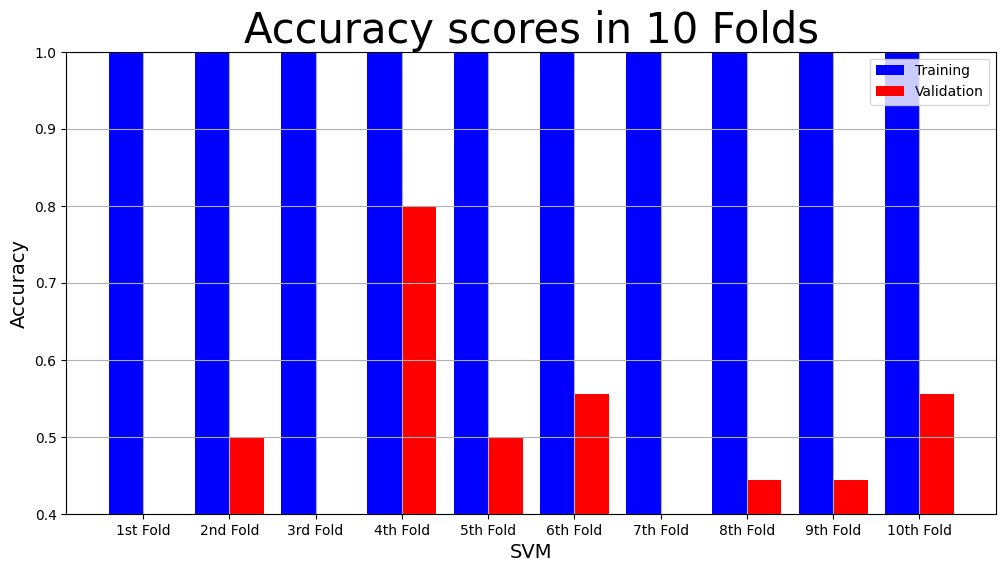

In [ ]:
model_name = "SVM"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            svm_result["Training Accuracy scores"],
            svm_result["Validation Accuracy scores"],
            num_folds=num_folds)

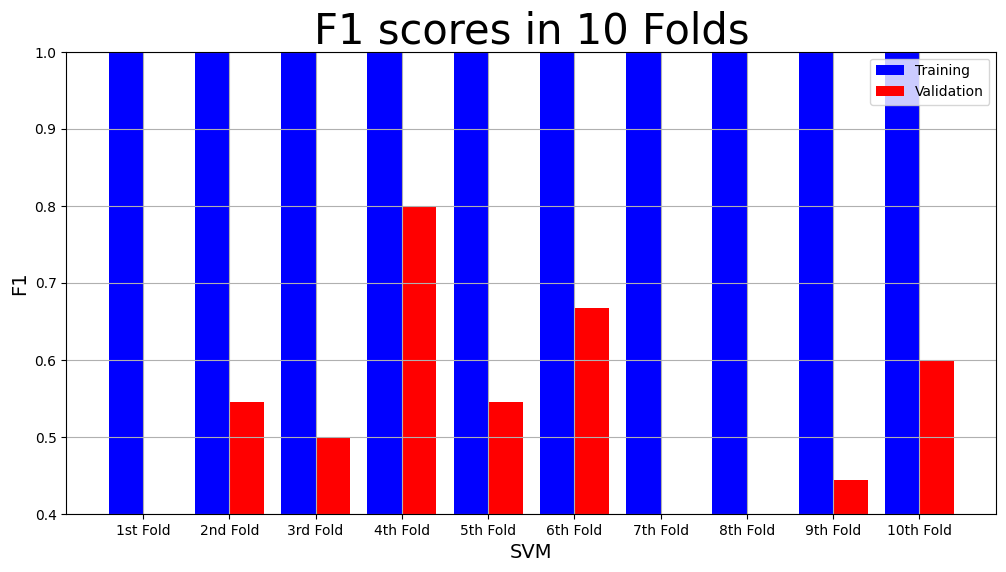

In [ ]:
model_name = "SVM"
plot_result(model_name,
            "F1",
            "F1 scores in 10 Folds",
            svm_result["Training F1 scores"],
            svm_result["Validation F1 scores"],
            num_folds=num_folds)

### IES data
---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#define the model
svm = LinearSVC(max_iter=50000)
#perform cross validation with model

svm_result_ies = cross_validation(svm, X_IES_ye, ies_y_E, num_folds)
svm_result_ies

{'Training Accuracy scores': array([0.62352941, 0.62352941, 0.61176471, 0.68235294, 0.57647059,
        0.61627907, 0.63953488, 0.65116279, 0.60465116, 0.60465116]),
 'Mean Training Accuracy': 62.33926128590971,
 'Training Precision scores': array([0.60655738, 0.61290323, 0.61016949, 0.6557377 , 0.58064516,
        0.6031746 , 0.62711864, 0.63333333, 0.59677419, 0.60344828]),
 'Mean Training Precision': 0.61298620105756,
 'Training Recall scores': array([0.82222222, 0.82608696, 0.7826087 , 0.86956522, 0.7826087 ,
        0.82608696, 0.80434783, 0.82608696, 0.80434783, 0.76086957]),
 'Mean Training Recall': 0.8104830917874397,
 'Training F1 scores': array([0.69811321, 0.7037037 , 0.68571429, 0.74766355, 0.66666667,
        0.69724771, 0.7047619 , 0.71698113, 0.68518519, 0.67307692]),
 'Mean Training F1 Score': 0.6979114266555199,
 'Validation Accuracy scores': array([0.6       , 0.6       , 0.3       , 0.3       , 0.7       ,
        0.88888889, 0.66666667, 0.66666667, 0.88888889, 0.444

In [ ]:
print(f"The main results are \n Mean Validation F1: {svm_result_ies['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result_ies['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.6840870240870242 
 Mean Validation Accuracy 60.55555555555555


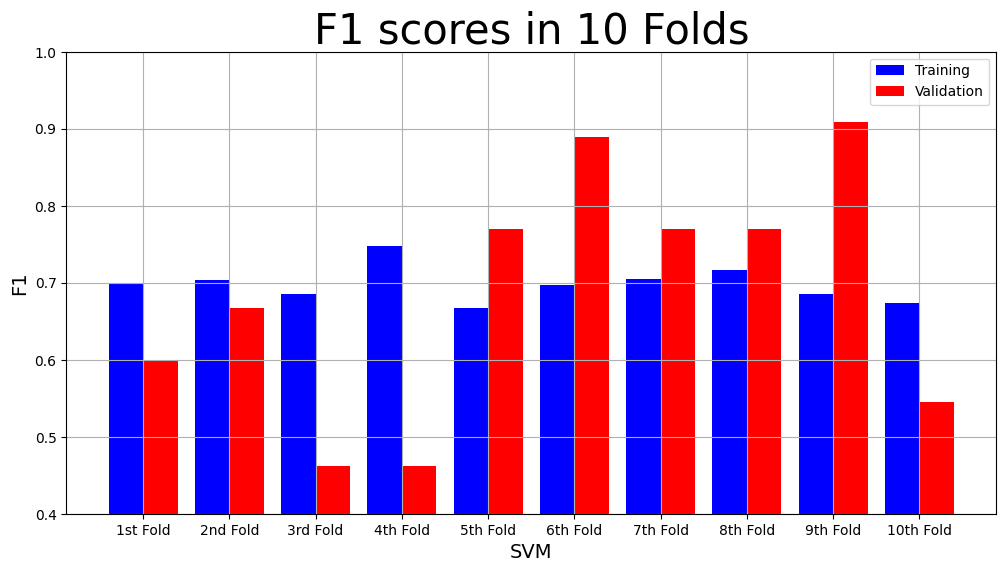

In [ ]:
model_name = "SVM"
plot_result(model_name,
            "F1",
            "F1 scores in 10 Folds",
            svm_result_ies["Training F1 scores"],
            svm_result_ies["Validation F1 scores"],
            num_folds=num_folds)

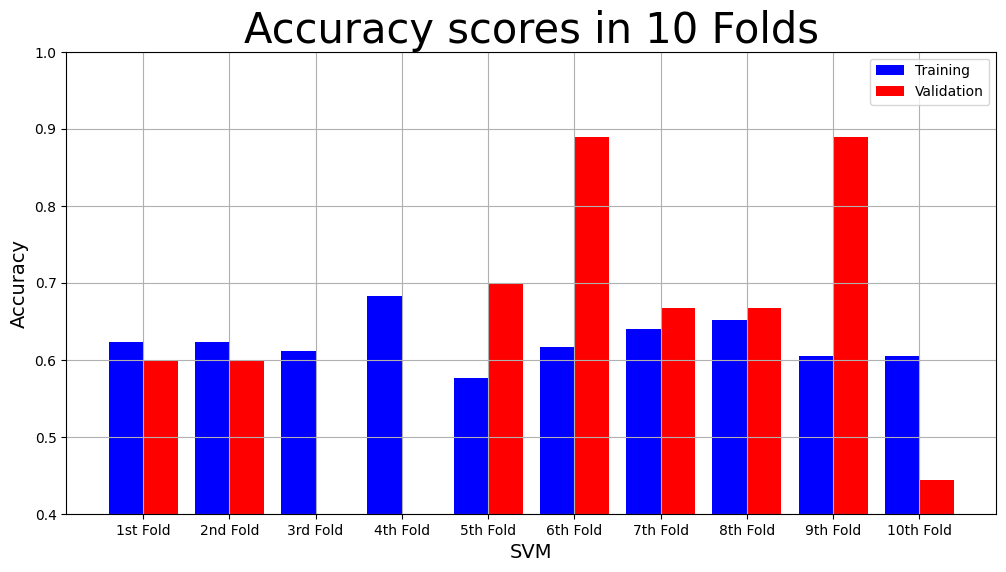

In [ ]:
model_name = "SVM"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            svm_result_ies["Training Accuracy scores"],
            svm_result_ies["Validation Accuracy scores"],
            num_folds=num_folds)

Let's train an svm and see some predictions

In [ ]:
svm.fit(X_IES_ye[:70], ies_y_E[:70])

LinearSVC(max_iter=50000)

In [ ]:
preds = svm.predict(X_IES_ye[70:])

In [ ]:
preds

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0])

In [ ]:
ies_y_E[70:]

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

In [ ]:
np.mean(preds == ies_y_E[70:])

0.64

In [ ]:
from sklearn.metrics import f1_score
f1_score(preds, ies_y_E[70:])

0.7096774193548386

We can see that using IES Data we get significantly better results than using BOLD data

## Logistic Regression
---

### BOLD Data

In [ ]:
from sklearn.linear_model import LogisticRegression
#define the model
logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model
logis_result = cross_validation(logis_reg_model, X_BOLD_ye, bold_y_E, num_folds)
logis_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.3       , 0.2       , 0.6       , 0.6       , 0.5       ,
        0.55555556, 0.33333333, 0.55555556, 0.44444444, 0.55555556]),
 'Mean Validation Accuracy': 46.444444444444436,
 'Validation Precision scores': array([0.4       , 0.28571429, 0.57142857, 0.6       , 0.5       ,
        0.57142857, 0.42857143, 0.66666667, 0.5       , 0.6       ]),
 'Mean Validation Precision': 0.5123809523809524,
 'Validation Recall scores': array([0.33333333, 0.4       , 0.8       , 0.6       , 0.6       ,
        0.8       , 0.6       , 0.

In [ ]:
print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.522020202020202 
 Mean Validation Accuracy 46.444444444444436


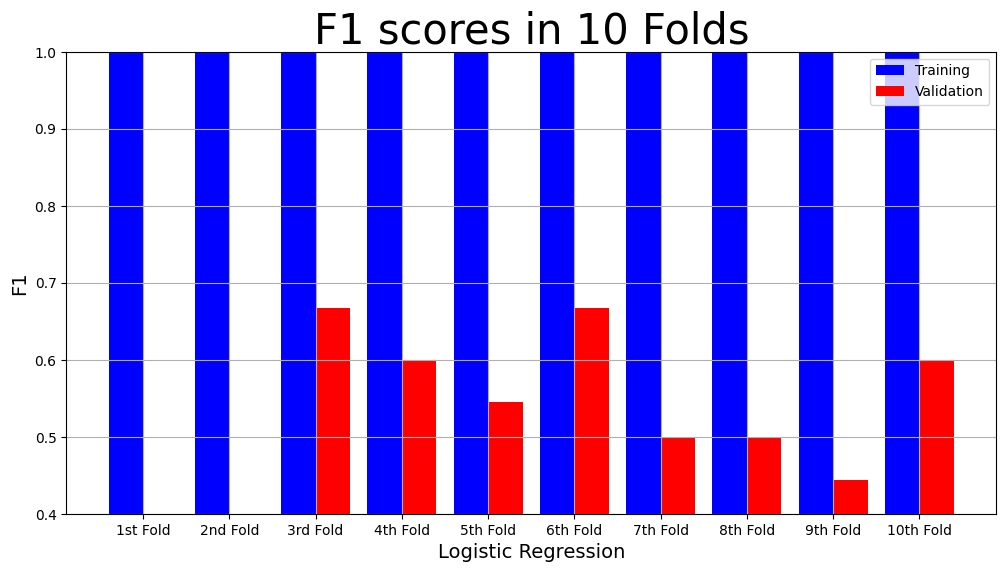

In [ ]:
model_name = "Logistic Regression"
plot_result(model_name,
            "F1",
            "F1 scores in 10 Folds",
            logis_result["Training F1 scores"],
            logis_result["Validation F1 scores"])

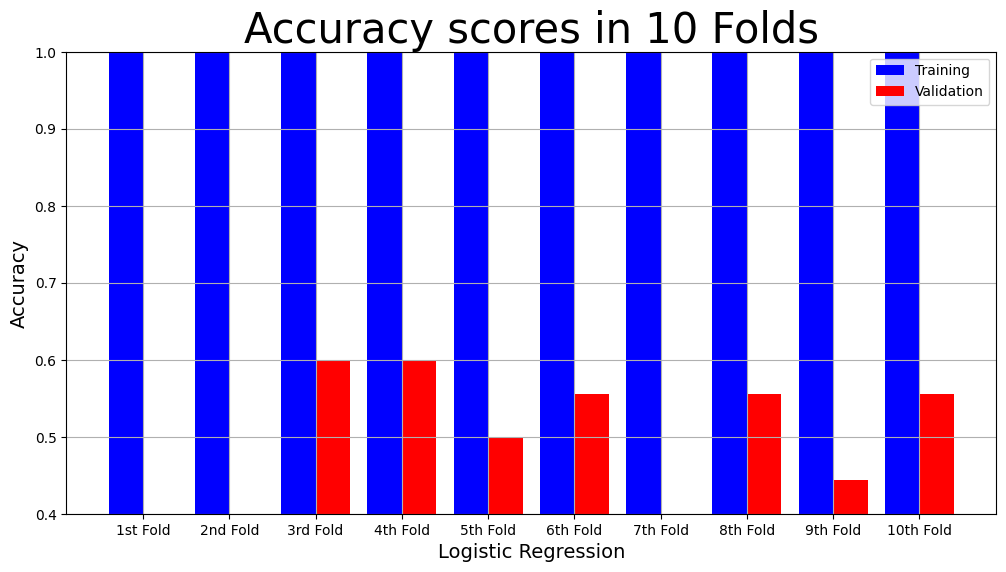

In [ ]:
model_name = "Logistic Regression"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            logis_result["Training Accuracy scores"],
            logis_result["Validation Accuracy scores"])

### IES Data

In [ ]:
from sklearn.linear_model import LogisticRegression
#define the model
logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model
logis_result = cross_validation(logis_reg_model, X_IES_ye, ies_y_E, num_folds)
logis_result

{'Training Accuracy scores': array([0.61176471, 0.61176471, 0.61176471, 0.69411765, 0.6       ,
        0.61627907, 0.62790698, 0.61627907, 0.59302326, 0.62790698]),
 'Mean Training Accuracy': 62.10807113543091,
 'Training Precision scores': array([0.59677419, 0.61016949, 0.61016949, 0.66666667, 0.6       ,
        0.61016949, 0.62068966, 0.61818182, 0.59016393, 0.62068966]),
 'Mean Training Precision': 0.61436743977442,
 'Training Recall scores': array([0.82222222, 0.7826087 , 0.7826087 , 0.86956522, 0.7826087 ,
        0.7826087 , 0.7826087 , 0.73913043, 0.7826087 , 0.7826087 ]),
 'Mean Training Recall': 0.7909178743961353,
 'Training F1 scores': array([0.69158879, 0.68571429, 0.68571429, 0.75471698, 0.67924528,
        0.68571429, 0.69230769, 0.67326733, 0.6728972 , 0.69230769]),
 'Mean Training F1 Score': 0.691347381395027,
 'Validation Accuracy scores': array([0.7       , 0.6       , 0.3       , 0.3       , 0.7       ,
        0.77777778, 0.66666667, 0.55555556, 0.77777778, 0.5555

In [ ]:
print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.6719763569763569 
 Mean Validation Accuracy 59.33333333333333


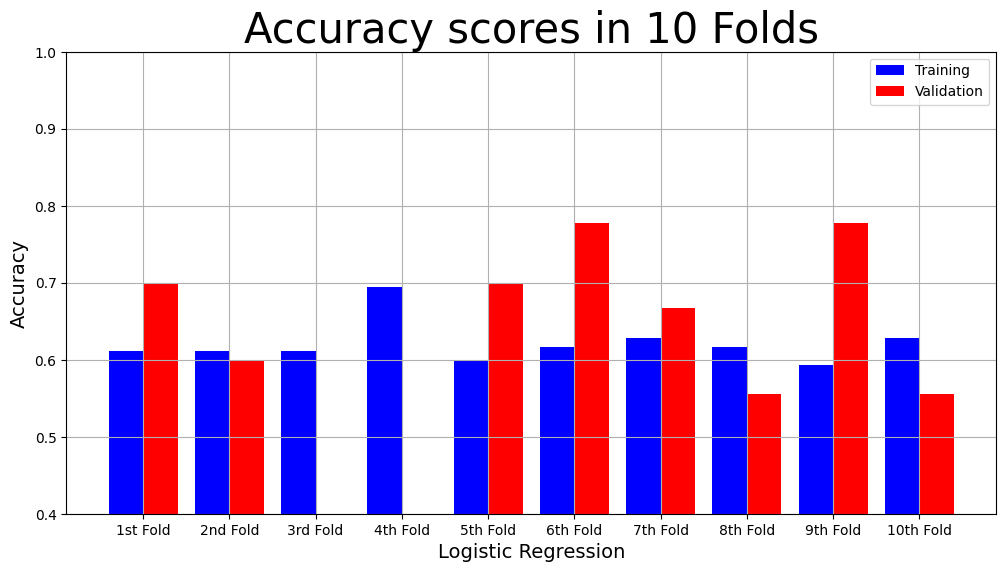

In [ ]:
model_name = "Logistic Regression"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            logis_result["Training Accuracy scores"],
            logis_result["Validation Accuracy scores"])

## Multi-layer Perceptron (MLP)
---

### BOLD Data

In [ ]:
from sklearn.neural_network import MLPClassifier
# the input layer of the neural network has size 72 (the number of features)
# we reduce this to 50 and then to 30 and in the last layer, we return 2 values (the classes)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=[50, 30]) # the solver is lbfgs because it works better than adam (the default one) for small datasets
mlp_result = cross_validation(mlp, X_BOLD_ye, bold_y_E, num_folds)
mlp_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.6       , 0.3       , 0.5       , 0.2       , 0.3       ,
        0.66666667, 0.55555556, 0.55555556, 0.66666667, 0.66666667]),
 'Mean Validation Accuracy': 50.11111111111111,
 'Validation Precision scores': array([0.66666667, 0.375     , 0.5       , 0.28571429, 0.25      ,
        0.75      , 0.66666667, 0.6       , 0.625     , 0.66666667]),
 'Mean Validation Precision': 0.5385714285714285,
 'Validation Recall scores': array([0.66666667, 0.6       , 1.        , 0.4       , 0.2       ,
        0.6       , 0.4       , 0.6

In [ ]:
print(f"The main results are \n Mean Validation F1: {mlp_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {mlp_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.5613597513597514 
 Mean Validation Accuracy 50.11111111111111


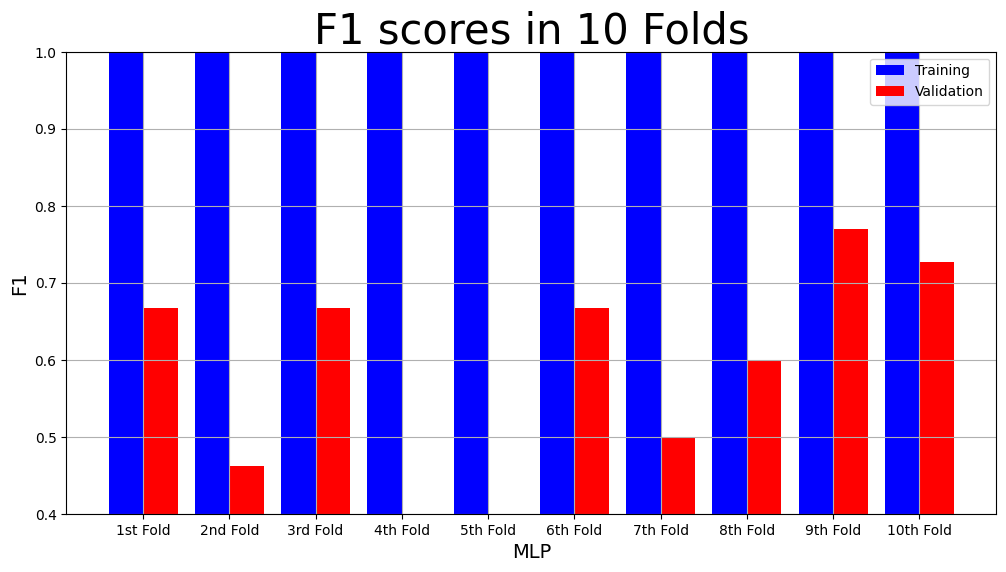

In [ ]:
model_name = "MLP"
plot_result(model_name,
            "F1",
            "F1 scores in 10 Folds",
            mlp_result["Training F1 scores"],
            mlp_result["Validation F1 scores"])

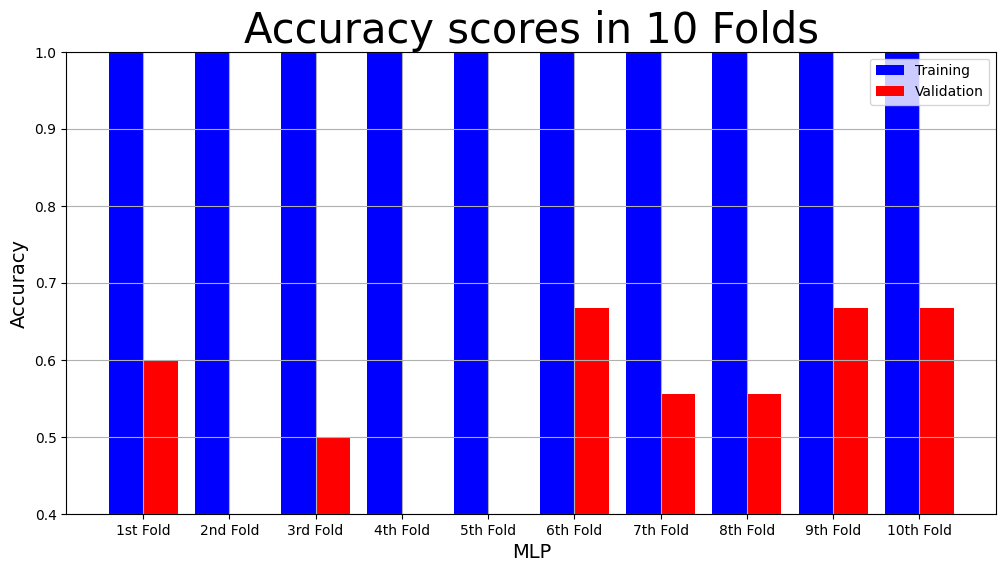

In [ ]:
model_name = "MLP"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            mlp_result["Training Accuracy scores"],
            mlp_result["Validation Accuracy scores"])

### IES Data

In [ ]:
from sklearn.neural_network import MLPClassifier
# the input layer of the neural network has size 72 (the number of features)
# we reduce this to 50 and then to 30 and in the last layer, we return 2 values (the classes)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=[50, 30], max_iter=5000) # the solver is lbfgs because it works better than adam (the default one) for small datasets
mlp_result = cross_validation(mlp, X_IES_ye, ies_y_E, num_folds)
mlp_result

{'Training Accuracy scores': array([0.90588235, 0.96470588, 1.        , 0.98823529, 0.96470588,
        1.        , 0.97674419, 1.        , 0.81395349, 0.97674419]),
 'Mean Training Accuracy': 95.90971272229822,
 'Training Precision scores': array([0.91111111, 0.95744681, 1.        , 0.9787234 , 0.95744681,
        1.        , 0.95833333, 1.        , 0.8       , 0.97826087]),
 'Mean Training Precision': 0.9541322335286259,
 'Training Recall scores': array([0.91111111, 0.97826087, 1.        , 1.        , 0.97826087,
        1.        , 1.        , 1.        , 0.86956522, 0.97826087]),
 'Mean Training Recall': 0.9715458937198067,
 'Training F1 scores': array([0.91111111, 0.96774194, 1.        , 0.98924731, 0.96774194,
        1.        , 0.9787234 , 1.        , 0.83333333, 0.97826087]),
 'Mean Training F1 Score': 0.962615990106068,
 'Validation Accuracy scores': array([0.4       , 0.4       , 0.4       , 0.5       , 0.2       ,
        0.66666667, 0.55555556, 0.55555556, 0.44444444, 0.55

In [ ]:
print(f"The main results are \n Mean Validation F1: {mlp_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {mlp_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.48515873015873023 
 Mean Validation Accuracy 46.77777777777778


## Conclusions from training to classify y_E
---

Consistently across multiple models (SVM, logistic regression, and multi-layer perceptron), using IES Data yields better performance than BOLD data

### SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#define the model
svm = LinearSVC(max_iter=100000)
#perform cross validation with model

svm_result = cross_validation(svm, X_BOLD_yn, bold_y_N, num_folds)
svm_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.7       , 0.5       , 0.8       , 0.5       , 0.6       ,
        0.44444444, 0.66666667, 0.44444444, 0.77777778, 0.22222222]),
 'Mean Validation Accuracy': 56.55555555555555,
 'Validation Precision scores': array([0.75      , 0.5       , 0.71428571, 0.5       , 0.57142857,
        0.33333333, 1.        , 0.5       , 1.        , 0.25      ]),
 'Mean Validation Precision': 0.6119047619047618,
 'Validation Recall scores': array([0.6 , 0.4 , 1.  , 0.6 , 0.8 , 0.25, 0.4 , 0.4 , 0.6 , 0.2 ]),
 'Mean Validation Recall': 0.525,

In [ ]:
print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.543037518037518 
 Mean Validation Accuracy 56.55555555555555


In [ ]:
ies_y_N

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#define the model
svm = LinearSVC(max_iter=50000)
#perform cross validation with model

svm_result_ies = cross_validation(svm, X_IES_yn, ies_y_N, num_folds)
svm_result_ies

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Training Accuracy scores': array([0.61176471, 0.61176471, 0.58823529, 0.62352941, 0.57647059,
        0.61627907, 0.60465116, 0.61627907, 0.6627907 , 0.60465116]),
 'Mean Training Accuracy': 61.16415868673051,
 'Training Precision scores': array([0.62790698, 0.62790698, 0.62162162, 0.63636364, 0.59090909,
        0.64285714, 0.61904762, 0.62790698, 0.66666667, 0.60869565]),
 'Mean Training Precision': 0.626988235987225,
 'Training Recall scores': array([0.61363636, 0.61363636, 0.52272727, 0.63636364, 0.59090909,
        0.6       , 0.59090909, 0.61363636, 0.68181818, 0.63636364]),
 'Mean Training Recall': 0.6100000000000001,
 'Training F1 scores': array([0.62068966, 0.62068966, 0.56790123, 0.63636364, 0.59090909,
        0.62068966, 0.60465116, 0.62068966, 0.6741573 , 0.62222222]),
 'Mean Training F1 Score': 0.6178963270913991,
 'Validation Accuracy scores': array([0.4       , 0.6       , 0.4       , 0.6       , 0.5       ,
        0.33333333, 0.66666667, 0.44444444, 0.33333333, 0.77

In [ ]:
print(f"The main results are \n Mean Validation F1: {svm_result_ies['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result_ies['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.4583549783549784 
 Mean Validation Accuracy 50.55555555555556


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#define the model
logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model
logis_result = cross_validation(logis_reg_model, X_BOLD_yn, bold_y_N, num_folds)
logis_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.7       , 0.5       , 0.8       , 0.5       , 0.6       ,
        0.44444444, 0.88888889, 0.44444444, 0.88888889, 0.33333333]),
 'Mean Validation Accuracy': 60.999999999999986,
 'Validation Precision scores': array([0.75      , 0.5       , 0.71428571, 0.5       , 0.57142857,
        0.        , 1.        , 0.5       , 1.        , 0.4       ]),
 'Mean Validation Precision': 0.5935714285714286,
 'Validation Recall scores': array([0.6, 0.4, 1. , 0.6, 0.8, 0. , 0.8, 0.4, 0.8, 0.4]),
 'Mean Validation Recall': 0.58,
 'Validat

In [ ]:
print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.5778787878787879 
 Mean Validation Accuracy 60.999999999999986


In [ ]:
from sklearn.linear_model import LogisticRegression
#define the model
logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model
logis_result = cross_validation(logis_reg_model, X_IES_ye, ies_y_E, num_folds)
logis_result

{'Training Accuracy scores': array([0.61176471, 0.61176471, 0.61176471, 0.69411765, 0.6       ,
        0.61627907, 0.62790698, 0.61627907, 0.59302326, 0.62790698]),
 'Mean Training Accuracy': 62.10807113543091,
 'Training Precision scores': array([0.59677419, 0.61016949, 0.61016949, 0.66666667, 0.6       ,
        0.61016949, 0.62068966, 0.61818182, 0.59016393, 0.62068966]),
 'Mean Training Precision': 0.61436743977442,
 'Training Recall scores': array([0.82222222, 0.7826087 , 0.7826087 , 0.86956522, 0.7826087 ,
        0.7826087 , 0.7826087 , 0.73913043, 0.7826087 , 0.7826087 ]),
 'Mean Training Recall': 0.7909178743961353,
 'Training F1 scores': array([0.69158879, 0.68571429, 0.68571429, 0.75471698, 0.67924528,
        0.68571429, 0.69230769, 0.67326733, 0.6728972 , 0.69230769]),
 'Mean Training F1 Score': 0.691347381395027,
 'Validation Accuracy scores': array([0.7       , 0.6       , 0.3       , 0.3       , 0.7       ,
        0.77777778, 0.66666667, 0.55555556, 0.77777778, 0.5555

In [ ]:
print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.6719763569763569 
 Mean Validation Accuracy 59.33333333333333


### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
# the input layer of the neural network has size 72 (the number of features)
# we reduce this to 50 and then to 30 and in the last layer, we return 2 values (the classes)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=[50, 30]) # the solver is lbfgs because it works better than adam (the default one) for small datasets
mlp_result = cross_validation(mlp, X_BOLD_yn, bold_y_N, num_folds)
mlp_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.6       , 0.6       , 0.6       , 0.6       , 0.5       ,
        0.44444444, 0.66666667, 0.66666667, 0.33333333, 0.22222222]),
 'Mean Validation Accuracy': 52.33333333333332,
 'Validation Precision scores': array([0.66666667, 0.57142857, 0.6       , 0.57142857, 0.5       ,
        0.        , 1.        , 0.66666667, 0.33333333, 0.33333333]),
 'Mean Validation Precision': 0.5242857142857142,
 'Validation Recall scores': array([0.4, 0.8, 0.6, 0.8, 0.4, 0. , 0.4, 0.8, 0.2, 0.4]),
 'Mean Validation Recall': 0.48000000000000

In [ ]:
print(f"The main results are \n Mean Validation F1: {mlp_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {mlp_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.47901154401154394 
 Mean Validation Accuracy 52.33333333333332


In [ ]:
from sklearn.neural_network import MLPClassifier
# the input layer of the neural network has size 72 (the number of features)
# we reduce this to 50 and then to 30 and in the last layer, we return 2 values (the classes)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=[50, 30], max_iter=5000) # the solver is lbfgs because it works better than adam (the default one) for small datasets
mlp_result_ies = cross_validation(mlp, X_IES_yn, ies_y_N, num_folds)
mlp_result_ies

{'Training Accuracy scores': array([0.90588235, 1.        , 0.82352941, 0.92941176, 1.        ,
        0.89534884, 0.90697674, 0.93023256, 0.98837209, 0.98837209]),
 'Mean Training Accuracy': 93.6812585499316,
 'Training Precision scores': array([0.89130435, 1.        , 0.82222222, 0.93181818, 1.        ,
        0.84615385, 0.90909091, 0.93181818, 1.        , 1.        ]),
 'Mean Training Precision': 0.9332407688929429,
 'Training Recall scores': array([0.93181818, 1.        , 0.84090909, 0.93181818, 1.        ,
        0.97777778, 0.90909091, 0.93181818, 0.97727273, 0.97727273]),
 'Mean Training Recall': 0.9477777777777776,
 'Training F1 scores': array([0.91111111, 1.        , 0.83146067, 0.93181818, 1.        ,
        0.90721649, 0.90909091, 0.93181818, 0.98850575, 0.98850575]),
 'Mean Training F1 Score': 0.9399527047093923,
 'Validation Accuracy scores': array([0.6       , 0.6       , 0.6       , 0.7       , 0.3       ,
        0.55555556, 0.44444444, 0.44444444, 0.22222222, 0.55

In [ ]:
print(f"The main results are \n Mean Validation F1: {mlp_result_ies['Mean Validation F1 Score']} \n Mean Validation Accuracy {mlp_result_ies['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.5142568542568543 
 Mean Validation Accuracy 50.22222222222222


### Conclusion


BOLD data seems to be a bit better than IES Data to predict y_N

## Training Y_A
---

### SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#define the model
svm = LinearSVC(max_iter=1000000)
#perform cross validation with model

svm_result = cross_validation(svm, X_BOLD_ya, bold_y_A, num_folds)
svm_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.84615385, 0.53846154, 0.76923077, 1.        , 0.46153846,
        0.76923077, 0.61538462, 0.91666667, 0.75      , 0.91666667]),
 'Mean Validation Accuracy': 75.83333333333333,
 'Validation Precision scores': array([0.77777778, 1.        , 0.75      , 1.        , 0.5       ,
        1.        , 1.        , 1.        , 0.71428571, 1.        ]),
 'Mean Validation Precision': 0.8742063492063492,
 'Validation Recall scores': array([1.        , 0.14285714, 0.85714286, 1.        , 0.28571429,
        0.57142857, 0.28571429, 0.8

In [ ]:
print(f"The main results are \n Mean Validation F1: {svm_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.7047766122766123 
 Mean Validation Accuracy 75.83333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#define the model
svm = LinearSVC(max_iter=1000000)
#perform cross validation with model

svm_result_ies = cross_validation(svm, X_IES_ya, ies_y_A, num_folds)
svm_result_ies

{'Training Accuracy scores': array([0.61403509, 0.68421053, 0.62280702, 0.61403509, 0.65789474,
        0.6754386 , 0.65789474, 0.70434783, 0.66086957, 0.68695652]),
 'Mean Training Accuracy': 65.78489702517162,
 'Training Precision scores': array([0.6       , 0.69354839, 0.62686567, 0.61111111, 0.65671642,
        0.65333333, 0.65217391, 0.67532468, 0.6375    , 0.67123288]),
 'Mean Training Precision': 0.647780638617394,
 'Training Recall scores': array([0.8       , 0.71666667, 0.7       , 0.73333333, 0.73333333,
        0.81666667, 0.75      , 0.85245902, 0.83606557, 0.80327869]),
 'Mean Training Recall': 0.7741803278688525,
 'Training F1 scores': array([0.68571429, 0.70491803, 0.66141732, 0.66666667, 0.69291339,
        0.72592593, 0.69767442, 0.75362319, 0.72340426, 0.73134328]),
 'Mean Training F1 Score': 0.7043600765666869,
 'Validation Accuracy scores': array([0.84615385, 0.23076923, 0.38461538, 0.76923077, 0.61538462,
        0.84615385, 0.69230769, 0.58333333, 0.66666667, 0.41

In [ ]:
print(f"The main results are \n Mean Validation F1: {svm_result_ies['Mean Validation F1 Score']} \n Mean Validation Accuracy {svm_result_ies['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.6363034188034189 
 Mean Validation Accuracy 60.51282051282052


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#define the model
logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model
logis_result = cross_validation(logis_reg_model, X_BOLD_ya, bold_y_A, num_folds)
logis_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.84615385, 0.53846154, 0.69230769, 0.92307692, 0.69230769,
        0.84615385, 0.69230769, 0.75      , 0.75      , 0.91666667]),
 'Mean Validation Accuracy': 76.47435897435898,
 'Validation Precision scores': array([0.77777778, 1.        , 0.71428571, 1.        , 0.71428571,
        1.        , 1.        , 1.        , 0.71428571, 1.        ]),
 'Mean Validation Precision': 0.8920634920634921,
 'Validation Recall scores': array([1.        , 0.14285714, 0.71428571, 0.85714286, 0.71428571,
        0.71428571, 0.42857143, 0.5

In [ ]:
print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.725497002997003 
 Mean Validation Accuracy 76.47435897435898


In [ ]:
from sklearn.linear_model import LogisticRegression
#define the model
logis_reg_model = LogisticRegression(penalty='l2', max_iter=10000)
#perform cross validation with model
logis_result_ies = cross_validation(logis_reg_model, X_IES_ye, ies_y_E, num_folds)
logis_result_ies

{'Training Accuracy scores': array([0.61176471, 0.61176471, 0.61176471, 0.69411765, 0.6       ,
        0.61627907, 0.62790698, 0.61627907, 0.59302326, 0.62790698]),
 'Mean Training Accuracy': 62.10807113543091,
 'Training Precision scores': array([0.59677419, 0.61016949, 0.61016949, 0.66666667, 0.6       ,
        0.61016949, 0.62068966, 0.61818182, 0.59016393, 0.62068966]),
 'Mean Training Precision': 0.61436743977442,
 'Training Recall scores': array([0.82222222, 0.7826087 , 0.7826087 , 0.86956522, 0.7826087 ,
        0.7826087 , 0.7826087 , 0.73913043, 0.7826087 , 0.7826087 ]),
 'Mean Training Recall': 0.7909178743961353,
 'Training F1 scores': array([0.69158879, 0.68571429, 0.68571429, 0.75471698, 0.67924528,
        0.68571429, 0.69230769, 0.67326733, 0.6728972 , 0.69230769]),
 'Mean Training F1 Score': 0.691347381395027,
 'Validation Accuracy scores': array([0.7       , 0.6       , 0.3       , 0.3       , 0.7       ,
        0.77777778, 0.66666667, 0.55555556, 0.77777778, 0.5555

In [ ]:
print(f"The main results are \n Mean Validation F1: {logis_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {logis_result_ies['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.6719763569763569 
 Mean Validation Accuracy 59.33333333333333


### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
# the input layer of the neural network has size 72 (the number of features)
# we reduce this to 50 and then to 30 and in the last layer, we return 2 values (the classes)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=[50, 30]) # the solver is lbfgs because it works better than adam (the default one) for small datasets
mlp_result = cross_validation(mlp, X_BOLD_ya, bold_y_A, num_folds)
mlp_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.69230769, 1.        , 0.61538462, 0.84615385, 0.53846154,
        0.84615385, 0.84615385, 0.83333333, 0.75      , 1.        ]),
 'Mean Validation Accuracy': 79.67948717948718,
 'Validation Precision scores': array([0.71428571, 1.        , 0.6       , 1.        , 0.6       ,
        1.        , 1.        , 1.        , 0.71428571, 1.        ]),
 'Mean Validation Precision': 0.862857142857143,
 'Validation Recall scores': array([0.71428571, 1.        , 0.85714286, 0.71428571, 0.42857143,
        0.71428571, 0.71428571, 0.66

In [ ]:
print(f"The main results are \n Mean Validation F1: {mlp_result['Mean Validation F1 Score']} \n Mean Validation Accuracy {mlp_result['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.798939883645766 
 Mean Validation Accuracy 79.67948717948718


In [ ]:
from sklearn.neural_network import MLPClassifier
# the input layer of the neural network has size 72 (the number of features)
# we reduce this to 50 and then to 30 and in the last layer, we return 2 values (the classes)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=[50, 30], max_iter=5000) # the solver is lbfgs because it works better than adam (the default one) for small datasets
mlp_result_ies = cross_validation(mlp, X_IES_ya, ies_y_A, num_folds)
mlp_result_ies

{'Training Accuracy scores': array([1.        , 1.        , 0.96491228, 0.87719298, 0.92982456,
        1.        , 1.        , 0.9826087 , 1.        , 1.        ]),
 'Mean Training Accuracy': 97.54538520213578,
 'Training Precision scores': array([1.        , 1.        , 0.98275862, 0.91071429, 0.94827586,
        1.        , 1.        , 0.98360656, 1.        , 1.        ]),
 'Mean Training Precision': 0.9825355325849955,
 'Training Recall scores': array([1.        , 1.        , 0.95      , 0.85      , 0.91666667,
        1.        , 1.        , 0.98360656, 1.        , 1.        ]),
 'Mean Training Recall': 0.9700273224043716,
 'Training F1 scores': array([1.        , 1.        , 0.96610169, 0.87931034, 0.93220339,
        1.        , 1.        , 0.98360656, 1.        , 1.        ]),
 'Mean Training F1 Score': 0.9761221986950398,
 'Validation Accuracy scores': array([0.92307692, 0.92307692, 0.84615385, 0.69230769, 0.69230769,
        0.76923077, 0.76923077, 0.83333333, 0.91666667, 0.9

In [ ]:
print(f"The main results are \n Mean Validation F1: {mlp_result_ies['Mean Validation F1 Score']} \n Mean Validation Accuracy {mlp_result_ies['Mean Validation Accuracy']}")

The main results are 
 Mean Validation F1: 0.8142690642690642 
 Mean Validation Accuracy 82.82051282051283


## Conclusion

Using SVM and logistic regression, BOLD data is better than IES to predict Y_A.
However, using MLP is able to give better results using IES than BOLD to predict Y_A.

---

OLD CODE

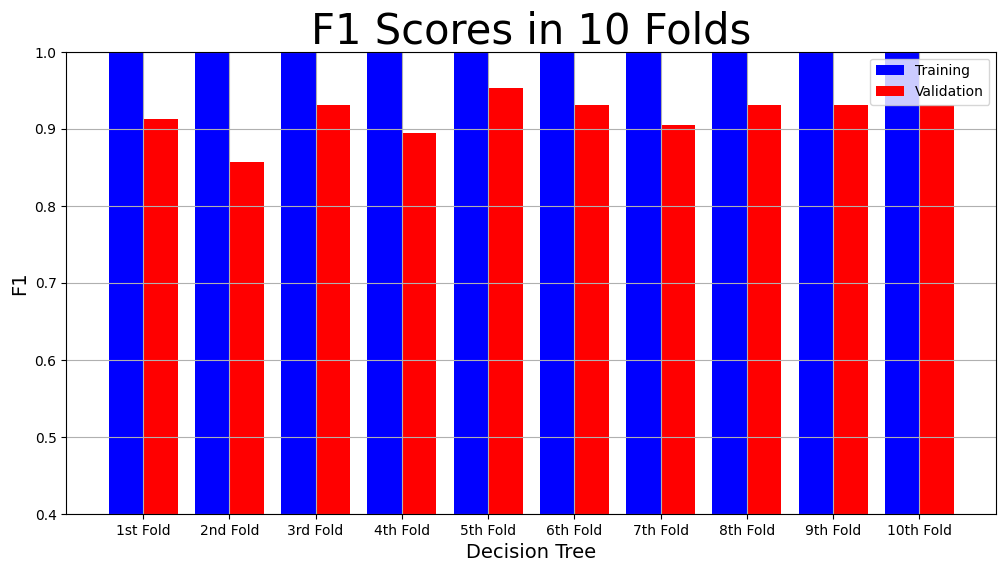

In [ ]:
# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 10 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])

The visualizations show that the training accuracy, precision, recall, and f1 scores in each fold are 100%. But the validation accuracy, precision, recall and f1 scores are not as high. We call this **over-fitting**. The model performs admirably on the training data. But not so much on the validation set.

##Increase Parameter to combat Over-fitting

Visualizing your results like this can help you see if your model is over-fitting. We adjust the min_samples_split hyper-parameter in the decision tree algorithm. It will fix the over-fitting problem. The default value of the min_samples_split parameter is 2. We increase the value to 5.

In [ ]:
decision_tree_model_2 = DecisionTreeClassifier(criterion="entropy",
                                               min_samples_split=5,
                                               random_state=0)
decision_tree_result_2 = cross_validation(decision_tree_model_2, X, encoded_y, 10) #specify 10 cross validation here
print(decision_tree_result_2)

{'Training Accuracy scores': array([0.99804688, 0.99804688, 0.99609375, 0.99609375, 0.99414062,
       0.9921875 , 0.99414062, 0.99609375, 0.99414062, 0.99220273]), 'Mean Training Accuracy': 99.51187104044834, 'Training Precision scores': array([0.9947644 , 1.        , 1.        , 0.98963731, 0.99473684,
       0.99470899, 1.        , 1.        , 0.99473684, 0.99470899]), 'Mean Training Precision': 0.9963293377233757, 'Training Recall scores': array([1.        , 0.99473684, 0.9895288 , 1.        , 0.9895288 ,
       0.98429319, 0.98429319, 0.9895288 , 0.9895288 , 0.98429319]), 'Mean Training Recall': 0.9905731606503169, 'Training F1 scores': array([0.99737533, 0.99736148, 0.99473684, 0.99479167, 0.99212598,
       0.98947368, 0.99208443, 0.99473684, 0.99212598, 0.98947368]), 'Mean Training F1 Score': 0.9934285926176409, 'Validation Accuracy scores': array([0.92982456, 0.84210526, 0.96491228, 0.9122807 , 0.98245614,
       0.94736842, 0.9122807 , 0.94736842, 0.96491228, 0.96428571]), 'M

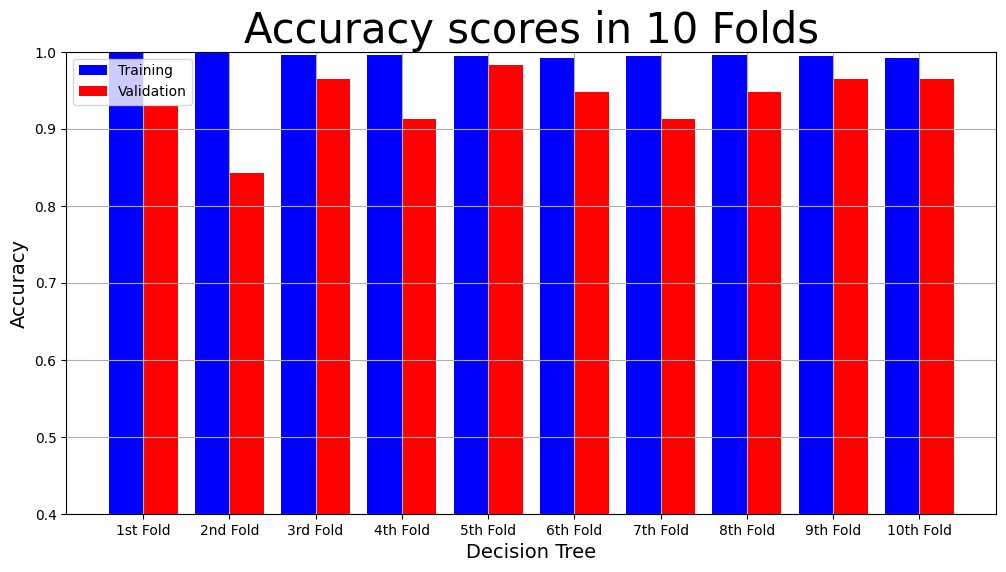

In [ ]:
# Plot Accuracy Result
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            decision_tree_result_2["Training Accuracy scores"],
            decision_tree_result_2["Validation Accuracy scores"])

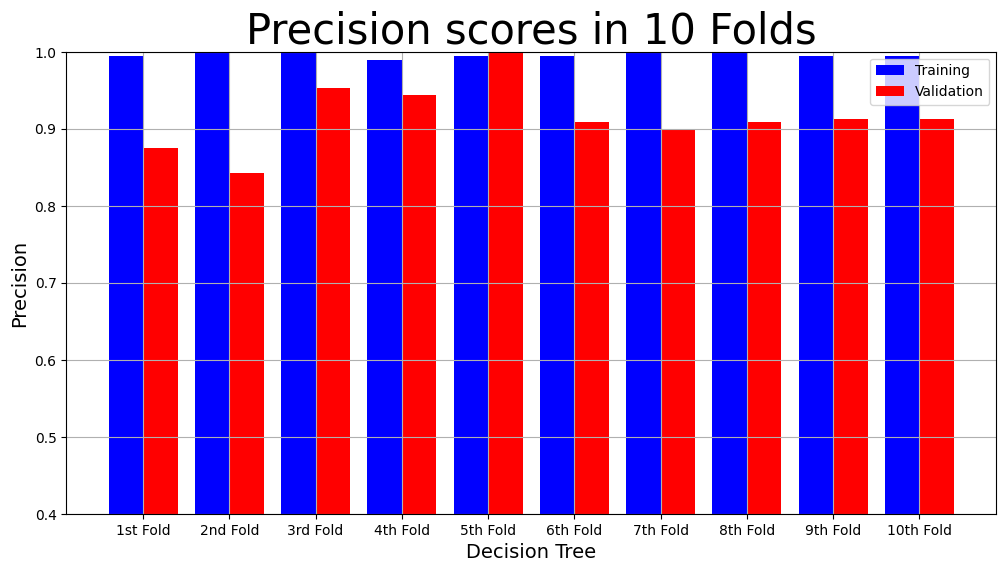

In [ ]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 10 Folds",
            decision_tree_result_2["Training Precision scores"],
            decision_tree_result_2["Validation Precision scores"])

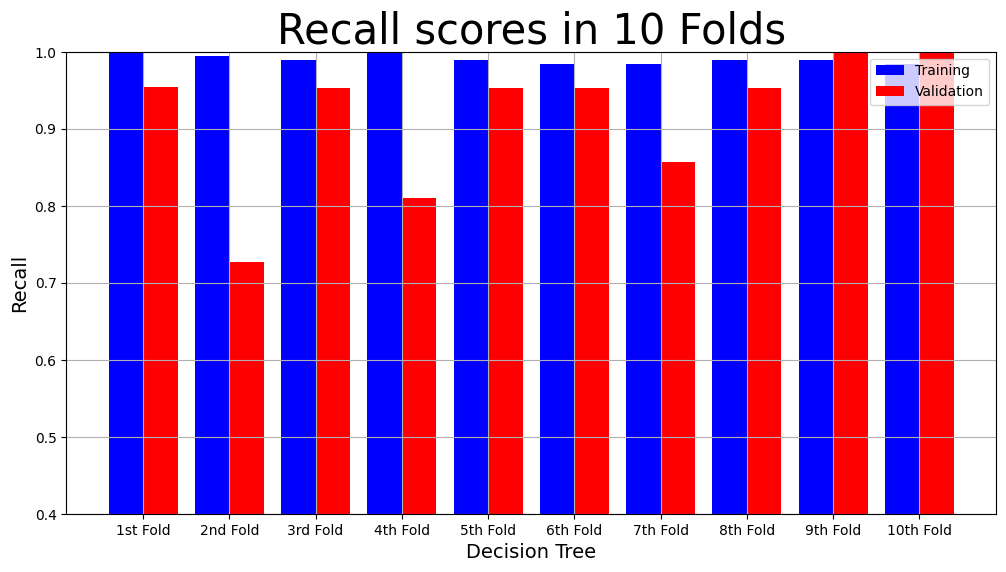

In [ ]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 10 Folds",
            decision_tree_result_2["Training Recall scores"],
            decision_tree_result_2["Validation Recall scores"])

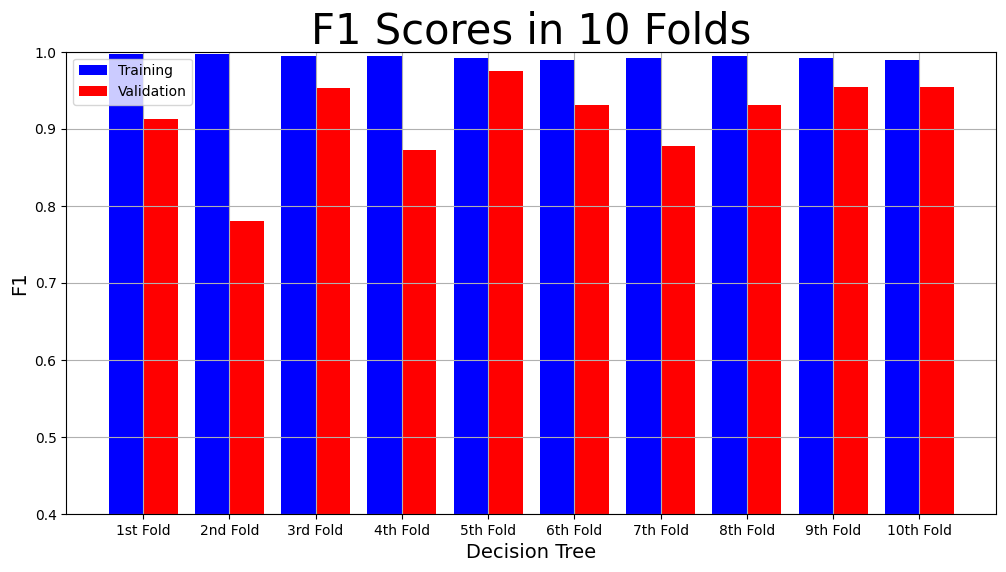

In [ ]:
# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 10 Folds",
            decision_tree_result_2["Training F1 scores"],
            decision_tree_result_2["Validation F1 scores"])